In [11]:
import numpy as np
from random import randint

def make_fair_dice(sides):
    """Return a die that returns 1 to SIDES with equal chance."""
    assert type(sides) == int and sides >= 1, 'Illegal value for sides'
    def dice():
        return randint(1,sides)
    return dice

four_sided = make_fair_dice(4)
six_sided = make_fair_dice(6)


In [12]:
"""CS 61A Presents The Game of Hog."""

#from dice import six_sided, four_sided, make_test_dice
#from ucb import main, trace, interact

GOAL_SCORE = 100  # The goal of Hog is to score 100 points.

######################
# Phase 1: Simulator #
######################


def roll_dice(num_rolls, dice=six_sided):
    """Simulate rolling the DICE exactly NUM_ROLLS > 0 times. Return the sum of
    the outcomes unless any of the outcomes is 1. In that case, return 1.

    num_rolls:  The number of dice rolls that will be made.
    dice:       A function that simulates a single dice roll outcome.
    """
    # These assert statements ensure that num_rolls is a positive integer.
    assert type(num_rolls) == int, 'num_rolls must be an integer.'
    assert num_rolls > 0, 'Must roll at least once.'
    # BEGIN PROBLEM 1
    score, pig_out = 0, False
    while num_rolls:
        die = dice()
        if die == 1:
            pig_out = True
        else:
            score += die
        num_rolls -= 1
    return (pig_out and 1) or score #If pig_out == True, and shortcircuits to last Tue val 1, else or will give first True val
    # END PROBLEM 1


def free_bacon(score):
    """Return the points scored from rolling 0 dice (Free Bacon).

    score:  The opponent's current score.
    """
    assert score < 100, 'The game should be over.'
    # BEGIN PROBLEM 2
    return (score % 10) * (score // 10) % 10 + 1
    # END PROBLEM 2


def take_turn(num_rolls, opponent_score, dice=six_sided):
    """Simulate a turn rolling NUM_ROLLS dice, which may be 0 (Free Bacon).
    Return the points scored for the turn by the current player.

    num_rolls:       The number of dice rolls that will be made.
    opponent_score:  The total score of the opponent.
    dice:            A function that simulates a single dice roll outcome.
    """
    # Leave these assert statements here; they help check for errors.
    assert type(num_rolls) == int, 'num_rolls must be an integer.'
    assert num_rolls >= 0, 'Cannot roll a negative number of dice in take_turn.'
    assert num_rolls <= 10, 'Cannot roll more than 10 dice.'
    assert opponent_score < 100, 'The game should be over.'
    # BEGIN PROBLEM 3
    if num_rolls == 0:
        return free_bacon(opponent_score)
    else:
        return roll_dice(num_rolls, dice)
    # END PROBLEM 3


def is_swap(score0, score1):
    """Return whether the current player's score has a ones digit
    equal to the opponent's score's tens digit."""
    # BEGIN PROBLEM 4
    if score0 == 0 and score1 == 0:
        return False
    if score0 % 10 == score1 // 10:
        return True
    else:
        return False
    # END PROBLEM 4


def other(player):
    """Return the other player, for a player PLAYER numbered 0 or 1.

    >>> other(0)
    1
    >>> other(1)
    0
    """
    return 1 - player


def silence(score0, score1):
    """Announce nothing (see Phase 2)."""
    return silence


def play(strategy0, strategy1, score0=0, score1=0, dice=six_sided,
         goal=GOAL_SCORE, say=silence):
    """Simulate a game and return the final scores of both players, with Player
    0's score first, and Player 1's score second.

    A strategy is a function that takes two total scores as arguments (the
    current player's score, and the opponent's score), and returns a number of
    dice that the current player will roll this turn.

    strategy0:  The strategy function for Player 0, who plays first.
    strategy1:  The strategy function for Player 1, who plays second.
    score0:     Starting score for Player 0
    score1:     Starting score for Player 1
    dice:       A function of zero arguments that simulates a dice roll.
    goal:       The game ends and someone wins when this score is reached.
    say:        The commentary function to call at the end of the first turn.
    """
    player = 0  # Which player is about to take a turn, 0 (first) or 1 (second)
    #turn_tracker = 0
    # BEGIN PROBLEM 5

    while score0 < goal and score1 < goal:
        if player == 1:
            num_rolls = strategy1(score1, score0)
            score1 += take_turn(num_rolls, score0, dice) # free_bacon is inside take_turn
            if is_swap(score1, score0):
                score1, score0 = score0, score1
        elif player == 0:
            score0 += take_turn(strategy0(score0, score1), score1, dice)
            if is_swap(score0, score1):
                score1, score0 = score0, score1
        player = other(player)
    # END PROBLEM 5
    # BEGIN PROBLEM 6
        say = say(score0, score1)
    # END PROBLEM 6
    return score0, score1
#######################
# Phase 2: Commentary #
#######################


def say_scores(score0, score1):
    """A commentary function that announces the score for each player."""
    print("Player 0 now has", score0, "and Player 1 now has", score1)
    return say_scores

def announce_lead_changes(previous_leader=None):
    """Return a commentary function that announces lead changes.

    >>> f0 = announce_lead_changes()
    >>> f1 = f0(5, 0)
    Player 0 takes the lead by 5
    >>> f2 = f1(5, 12)
    Player 1 takes the lead by 7
    >>> f3 = f2(8, 12)
    >>> f4 = f3(8, 13)
    >>> f5 = f4(15, 13)
    Player 0 takes the lead by 2
    """
    def say(score0, score1):
        if score0 > score1:
            leader = 0
        elif score1 > score0:
            leader = 1
        else:
            leader = None
        if leader != None and leader != previous_leader:
            print('Player', leader, 'takes the lead by', abs(score0 - score1))
        return announce_lead_changes(leader)
    return say

def both(f, g):
    """Return a commentary function that says what f says, then what g says.

    >>> h0 = both(say_scores, announce_lead_changes())
    >>> h1 = h0(10, 0)
    Player 0 now has 10 and Player 1 now has 0
    Player 0 takes the lead by 10
    >>> h2 = h1(10, 6)
    Player 0 now has 10 and Player 1 now has 6
    >>> h3 = h2(6, 18) # Player 0 gets 8 points, then Swine Swap applies
    Player 0 now has 6 and Player 1 now has 18
    Player 1 takes the lead by 12
    """
    def say(score0, score1):
        return both(f(score0, score1), g(score0, score1))
    return say


def announce_highest(who, previous_high=0, previous_score=0):
    """Return a commentary function that announces when WHO's score
    increases by more than ever before in the game.

    >>> f0 = announce_highest(1) # Only announce Player 1 score gains
    >>> f1 = f0(11, 0)
    >>> f2 = f1(11, 9)
    9 point(s)! That's the biggest gain yet for Player 1
    >>> f3 = f2(20, 9)
    >>> f4 = f3(12, 20) # Player 1 gets 3 points, then Swine Swap applies
    11 point(s)! That's the biggest gain yet for Player 1
    >>> f5 = f4(20, 32) # Player 0 gets 20 points, then Swine Swap applies
    12 point(s)! That's the biggest gain yet for Player 1
    >>> f6 = f5(20, 42) # Player 1 gets 10 points; not enough for a new high
    """
    assert who == 0 or who == 1, 'The who argument should indicate a player.'
    # BEGIN PROBLEM 7
    def gain(score0, score1):
        if who == 0:
            current_score = score0
        else:
            current_score = score1
        gain = current_score - previous_score
        highest_gain = previous_high
        if gain > highest_gain:
            highest_gain = gain #i.e. "current gain is now the highest"
            print(highest_gain, "point(s)! That's the biggest gain yet for Player", who)
        return announce_highest(who, highest_gain, current_score)
    return gain
    # END PROBLEM 7


#######################
# Phase 3: Strategies #
#######################


def always_roll(n):
    """Return a strategy that always rolls N dice.

    A strategy is a function that takes two total scores as arguments (the
    current player's score, and the opponent's score), and returns a number of
    dice that the current player will roll this turn.

    >>> strategy = always_roll(5)
    >>> strategy(0, 0)
    5
    >>> strategy(99, 99)
    5
    """
    def strategy(score, opponent_score):
        return n
    return strategy


def make_averaged(fn, num_samples=10000):
    """Return a function that returns the average value of FN when called.

    To implement this function, you will have to use *args syntax, a new Python
    feature introduced in this project.  See the project description.

    >>> dice = make_test_dice(4, 2, 5, 1)
    >>> averaged_dice = make_averaged(dice, 1000)
    >>> averaged_dice()
    3.0
    """
    # BEGIN PROBLEM 8
    def repeat_and_average(*args):
        total = 0
        for i in range (0, num_samples):
            total += fn(*args)
        return total/num_samples
    return repeat_and_average
    # END PROBLEM 8


def max_scoring_num_rolls(dice=six_sided, num_samples=10000):
    """Return the number of dice (1 to 10) that gives the highest average turn
    score by calling roll_dice with the provided DICE over NUM_SAMPLES times.
    Assume that the dice always return positive outcomes.

    >>> dice = make_test_dice(1, 6)
    >>> max_scoring_num_rolls(dice)
    1
    """
    # BEGIN PROBLEM 9
    max_score, number_of_dice, best_dice = 0, 1, 0
    while number_of_dice <= 10:
        score = make_averaged(roll_dice, num_samples)(number_of_dice, dice)
#        print("num_rolls:", number_of_dice, "av_score: ", score)
        if score > max_score:
            best_dice, max_score = number_of_dice, score
        number_of_dice += 1
    return best_dice
    # END PROBLEM 9
#>>> max_scoring_num_rolls()
#num_rolls: 1 av_score:  3.49535
#num_rolls: 2 av_score:  5.85743
#num_rolls: 3 av_score:  7.32991
#num_rolls: 4 av_score:  8.25496
#num_rolls: 5 av_score:  8.59808
#num_rolls: 6 av_score:  8.64769
#num_rolls: 7 av_score:  8.55689
#num_rolls: 8 av_score:  8.11398
#num_rolls: 9 av_score:  7.77904
#num_rolls: 10 av_score:  7.33997

def winner(strategy0, strategy1):
    """Return 0 if strategy0 wins against strategy1, and 1 otherwise."""
    score0, score1 = play(strategy0, strategy1)
    if score0 > score1:
        return 0
    else:
        return 1


def average_win_rate(strategy, baseline=always_roll(4)):
    """Return the average win rate of STRATEGY against BASELINE. Averages the
    winrate when starting the game as player 0 and as player 1.
    """
    win_rate_as_player_0 = 1 - make_averaged(winner)(strategy, baseline)
    win_rate_as_player_1 = make_averaged(winner)(baseline, strategy)

    return (win_rate_as_player_0 + win_rate_as_player_1) / 2


def run_experiments():
    """Run a series of strategy experiments and report results."""
    if False:  # Change to False when done finding max_scoring_num_rolls
        six_sided_max = max_scoring_num_rolls(six_sided)
        print('Max scoring num rolls for six-sided dice:', six_sided_max)

    if False:  # Change to True to test always_roll(8)
        print('always_roll(8) win rate:', average_win_rate(always_roll(8)))

    if False:  # Change to True to test bacon_strategy
        print('my_bacon_strategy win rate:', average_win_rate(bacon_strategy))

    if False:  # Change to True to test swap_strategy
        print('my_swap_strategy win rate:', average_win_rate(swap_strategy))

    if True:  # Change to True to test final_strategy
        print('final_strategy win rate:', average_win_rate(final_strategy))

    "*** You may add additional experiments as you wish ***"


def bacon_strategy(score, opponent_score, margin=8, num_rolls=4):
    """This strategy rolls 0 dice if that gives at least MARGIN points, and
    rolls NUM_ROLLS otherwise.
    """
    # BEGIN PROBLEM 10
    if free_bacon(opponent_score) >= margin:
        return 0
    else:
        return num_rolls
    # END PROBLEM 10

def swap_strategy(score, opponent_score, margin=8, num_rolls=4):
    """This strategy rolls 0 dice when it triggers a beneficial swap. It also
    rolls 0 dice if it gives at least MARGIN points. Otherwise, it rolls
    NUM_ROLLS. ********BAD_PART: "It also returns 0 if rolling 0 would give at least margin points,
    even if this would cause a non-beneficial swap."
    """
    # BEGIN PROBLEM 11
    if score < opponent_score and is_swap(score + free_bacon(opponent_score), opponent_score):
            return 0
    else:
        return bacon_strategy(score, opponent_score, margin, num_rolls)
    # END PROBLEM 11

###***      ____MY BACON LISTS____      ***###
ls_10 =[19, 33, 77, 91] #from Excel :)
ls_9 = [18, 24, 29, 36, 42, 47, 63, 68, 74, 81, 86, 92]
ls_8 = [17, 39, 71, 93]
ls_7 = [16, 23, 28, 32, 44, 49, 61, 66, 78, 82, 87, 94]
ls_6 = [16, 35, 51, 53, 55, 57, 59, 75, 95]
ls_5 = [14, 22, 27, 38, 41, 46, 64, 69, 72, 83, 88, 96]
ls_4 = [13, 31, 79, 97]
ls_3 = [12, 21, 26, 34, 43, 48, 62, 67, 76, 84, 89, 98]
ls_2 = [11, 37, 73, 99]
ls_1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 25, 30, 40, 45, 50, 52, 54, 56, 60, 65, 70, 80, 85, 90]

def my_bacon_strategy(opponent_score, desired_bacon=(ls_10+ls_9), num_rolls=6):
    #desired = ls_10 + ls_9
    if opponent_score in desired_bacon:
        return 0
    else:
        return num_rolls

def my_swap_strategy(sc, opp_sc, margin1=8, margin2=8, desired_bacon=(ls_10+ls_9)):
    """ Returns num_rolls to force swap, if swap is desirable by either rollin 0, or 10 (to get 1)
    """
    opp_lead = opp_sc - sc
    if opp_lead > margin1 and is_swap(sc + free_bacon(opp_sc), opp_sc):
        return 0
    elif opp_lead > margin2 and is_swap(sc + 1, opp_sc):
        return 10
    else:
        return my_bacon_strategy(opp_sc, desired_bacon)



def final_strategy(sc, opp_sc):
    """Write a brief description of your final strategy.

    *** YOUR DESCRIPTION HERE ***
    """ # BEGIN PROBLEM 12
#    bacon = (opp_sc % 10) * (opp_sc // 10) % 10 + 1 # return 0
#    if sc + bacon >= 90:
#        return 0
#    elif (opp_sc - sc) > 10 and is_swap(sc + 1, opp_sc):
#        return 10 # to forse swap
#    else:
#        return my_swap_strategy(sc, opp_sc, 8, 8, ls_10+ls_9)
    bacon = (opp_sc % 10) * (opp_sc // 10) % 10 + 1 # return 0
    my_bacon = (sc % 10) * (sc // 10) % 10 + 1

    if sc < 3 : # starting the game
        return 10

    if sc + bacon >= 100: #if bacon can end the game
        return 0
    #chance of getting 1 = .166 , .3056 , .4213 , .5177 , .5981 ,
     #.6651 , .7209 , .7674 , .8062 , .833
    if sc < opp_sc:

        if is_swap(sc + 1, opp_sc):
            return 10
        elif is_swap(sc + bacon, opp_sc):
            return 0
        elif opp_sc > sc :
            acc_risk = 45 - (opp_sc - sc)
            total = 1
            risk = 15
            while risk < acc_risk :
                risk = risk * 1.3
                total += 1
            return total

    
    if sc > opp_sc:
        if sc > (opp_sc + 22) and not is_swap(sc + 1, opp_sc ) :
            if bacon > 9 and not is_swap(sc + bacon, opp_sc) :
                return 0
            else:
                return 7

        if is_swap(sc + 1, opp_sc ) or is_swap(sc + bacon, opp_sc):
            return 4
        elif is_swap(sc + 1 , opp_sc + 1) or is_swap(sc + 1 , opp_sc + my_bacon) :
            return 4
        elif sc > opp_sc :
            acc_risk = 75 - (sc - opp_sc)
            total = 1
            risk = 15
            while risk < acc_risk :
                risk = risk * 1.5
                total += 1
            return total

    return 5


    # END PROBLEM 12
##########################
# Command Line Interface #
##########################

# NOTE: Functions in this section do not need to be changed. They use features
# of Python not yet covered in the course.



In [13]:
np.save("final_matrix.npy", np.full((100, 100), -1))

In [14]:
f = np.load("final_matrix.npy")

In [15]:
def our_strategy(score, opp_score):
    return f[score][opp_score]

In [16]:
def test_strat():
    score_arr = np.load("final_matrix.npy")
    def our_strategy(score, opp_score):
        if int(score_arr[score][opp_score]) == -1:
            return final_strategy(score, opp_score)
        return int(score_arr[score][opp_score])
    
    for score in reversed(range(1, 100)):
        for opp_score in reversed(range(1, 100)):
            print("score and opp score: ", score, opp_score)
            roll_arr = []   #array w. 11 items (0 to 10) ==> win percentage
            for roll in range(0, 11):
                total_plays = 0
                wins = 0 # to divide to get win rate
                for trial in range(0, 1000):
                    new_score = score + take_turn(roll, opp_score)
                    if new_score < 100:
                        if int(our_strategy(new_score, opp_score)) != -1:
                            new_score, new_opp_score = play(our_strategy, final_strategy, new_score, opp_score)
                        else:
                            print(new_score, opp_score, our_strategy(new_score, opp_score), type(our_strategy(new_score, opp_score)))
                            new_score, new_opp_score = play(final_strategy, final_strategy, new_score, opp_score)
                    if new_score > opp_score:
                        wins += 1
                    total_plays += 1
                roll_arr.append(wins/total_plays)
            print("roll arr:", roll_arr)
            score_arr[score][opp_score] = np.argmax(roll_arr)
            print(score_arr[score][opp_score])
            np.save("final_matrix.npy", score_arr)

In [17]:
test_strat()


score and opp score:  99 99
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  99 98
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  99 97
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  99 96
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  99 95
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  99 94
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  99 93
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  99 92
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  99 91
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  99 90
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  99 89
roll arr: [1

roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  99 11
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  99 10
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  99 9
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  99 8
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  99 7
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  99 6
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  99 5
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  99 4
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  99 3
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  99 2
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

score and opp score:  98 27
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  98 26
roll arr: [1.0, 0.827, 0.698, 0.568, 0.483, 0.383, 0.358, 0.305, 0.223, 0.201, 0.154]
0
score and opp score:  98 25
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  98 24
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  98 23
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  98 22
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  98 21
roll arr: [1.0, 0.838, 0.674, 0.591, 0.487, 0.374, 0.321, 0.264, 0.244, 0.192, 0.156]
0
score and opp score:  98 20
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  98 19
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  98 18
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0


score and opp score:  97 42
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  97 41
roll arr: [1.0, 0.84, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  97 40
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  97 39
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  97 38
roll arr: [1.0, 0.826, 0.701, 0.557, 0.452, 0.388, 0.357, 0.283, 0.213, 0.185, 0.154]
0
score and opp score:  97 37
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  97 36
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  97 35
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  97 34
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  97 33
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score

score and opp score:  96 59
roll arr: [1.0, 0.827, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  96 58
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  96 57
roll arr: [1.0, 0.819, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  96 56
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  96 55
roll arr: [1.0, 0.829, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  96 54
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  96 53
roll arr: [1.0, 0.811, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  96 52
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  96 51
roll arr: [1.0, 0.848, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  96 50
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  96 49
ro

roll arr: [1.0, 0.826, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  95 73
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  95 72
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  95 71
roll arr: [1.0, 0.833, 0.96, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  95 70
roll arr: [0.744, 0.958, 0.914, 0.894, 0.849, 0.873, 0.841, 0.805, 0.816, 0.816, 0.777]
1
score and opp score:  95 69
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  95 68
roll arr: [1.0, 0.85, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  95 67
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  95 66
roll arr: [1.0, 0.832, 0.967, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  95 65
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  95 64
roll arr

0
score and opp score:  94 90
roll arr: [1.0, 0.831, 0.979, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  94 89
roll arr: [1.0, 0.836, 0.693, 0.587, 0.49, 0.393, 0.321, 0.282, 0.222, 0.217, 0.166]
0
score and opp score:  94 88
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  94 87
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  94 86
roll arr: [1.0, 0.822, 0.947, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  94 85
roll arr: [1.0, 0.929, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  94 84
roll arr: [1.0, 0.844, 0.716, 0.57, 0.449, 0.375, 0.346, 0.292, 0.244, 0.192, 0.168]
0
score and opp score:  94 83
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  94 82
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  94 81
roll arr: [1.0, 0.816, 0.947, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

score and opp score:  94 8
roll arr: [1.0, 0.812, 0.937, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  94 7
roll arr: [1.0, 0.785, 0.954, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  94 6
roll arr: [1.0, 0.783, 0.934, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  94 5
roll arr: [1.0, 0.801, 0.947, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  94 4
roll arr: [1.0, 0.798, 0.947, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  94 3
roll arr: [1.0, 0.804, 0.934, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  94 2
roll arr: [1.0, 0.794, 0.949, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  94 1
roll arr: [1.0, 0.809, 0.946, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  93 99
roll arr: [0.663, 0.552, 0.843, 0.853, 0.792, 0.767, 0.748, 0.712, 0.726, 0.684, 0.692]
3
score and opp score:  93 98
roll arr: [0.0, 0.509, 0.709, 0.569, 0.466, 0.409, 0.339, 0.29

score and opp score:  93 25
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  93 24
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  93 23
roll arr: [1.0, 0.824, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  93 22
roll arr: [1.0, 0.841, 0.968, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  93 21
roll arr: [0.901, 0.815, 0.926, 0.996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
4
score and opp score:  93 20
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  93 19
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  93 18
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  93 17
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  93 16
roll arr: [1.0, 0.81, 0.697, 0.572, 0.501, 0.419, 0.368, 0.291, 0.226, 0.209, 0.143]
0
score a

score and opp score:  92 43
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  92 42
roll arr: [1.0, 0.847, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  92 41
roll arr: [1.0, 0.985, 0.884, 0.989, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  92 40
roll arr: [0.751, 0.966, 0.92, 0.88, 0.889, 0.847, 0.817, 0.822, 0.82, 0.798, 0.781]
1
score and opp score:  92 39
roll arr: [1.0, 0.839, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  92 38
roll arr: [1.0, 0.826, 0.888, 0.964, 0.967, 0.953, 0.954, 0.948, 0.935, 0.937, 0.942]
0
score and opp score:  92 37
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  92 36
roll arr: [1.0, 0.821, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  92 35
roll arr: [1.0, 0.824, 0.961, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  92 34
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

roll arr: [1.0, 0.966, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  91 61
roll arr: [1.0, 0.973, 0.792, 0.919, 0.923, 0.896, 0.882, 0.886, 0.852, 0.862, 0.86]
0
score and opp score:  91 60
roll arr: [1.0, 0.962, 0.987, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  91 59
roll arr: [1.0, 0.998, 0.87, 0.969, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  91 58
roll arr: [1.0, 0.947, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  91 57
roll arr: [1.0, 0.997, 0.847, 0.975, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  91 56
roll arr: [0.908, 0.941, 0.968, 0.971, 0.95, 0.945, 0.954, 0.938, 0.931, 0.922, 0.942]
3
score and opp score:  91 55
roll arr: [1.0, 0.993, 0.865, 0.973, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  91 54
roll arr: [1.0, 0.953, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  91 53
roll arr: [1.0, 0.994, 0.845, 0.971, 1.0, 1.0, 1.0, 1.0, 1.0, 1

roll arr: [1.0, 0.992, 0.944, 0.997, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  90 79
roll arr: [1.0, 0.826, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  90 78
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  90 77
roll arr: [1.0, 1.0, 0.904, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  90 76
roll arr: [1.0, 0.825, 0.946, 0.959, 0.952, 0.958, 0.943, 0.938, 0.941, 0.943, 0.924]
0
score and opp score:  90 75
roll arr: [1.0, 0.834, 0.685, 0.573, 0.5, 0.401, 0.335, 0.322, 0.242, 0.196, 0.167]
0
score and opp score:  90 74
roll arr: [1.0, 1.0, 0.852, 0.972, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  90 73
roll arr: [1.0, 0.954, 0.974, 0.985, 0.982, 0.976, 0.975, 0.977, 0.973, 0.983, 0.974]
0
score and opp score:  90 72
roll arr: [1.0, 0.823, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  90 71
roll arr: [1.0, 0.98, 0.832, 0.898, 0.922, 0.896, 0.894, 0.88

roll arr: [1.0, 1.0, 0.859, 0.953, 0.997, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  89 99
roll arr: [0.516, 0.64, 0.668, 0.906, 0.948, 0.947, 0.942, 0.939, 0.942, 0.913, 0.914]
4
score and opp score:  89 98
roll arr: [0.397, 0.32, 0.578, 0.766, 0.721, 0.69, 0.669, 0.63, 0.611, 0.603, 0.558]
3
score and opp score:  89 97
roll arr: [0.0, 0.242, 0.595, 0.584, 0.496, 0.411, 0.362, 0.278, 0.235, 0.194, 0.156]
2
score and opp score:  89 96
roll arr: [0.0, 0.492, 0.658, 0.552, 0.492, 0.385, 0.31, 0.294, 0.249, 0.184, 0.185]
2
score and opp score:  89 95
roll arr: [1.0, 0.848, 0.978, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  89 94
roll arr: [1.0, 0.858, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  89 93
roll arr: [1.0, 0.837, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  89 92
roll arr: [1.0, 0.835, 0.675, 0.586, 0.501, 0.388, 0.334, 0.286, 0.234, 0.2, 0.164]
0
score and opp score:  89 91
roll arr: [0.0, 1.0, 0.91

roll arr: [1.0, 0.982, 0.877, 0.906, 0.966, 0.978, 0.973, 0.97, 0.966, 0.969, 0.958]
0
score and opp score:  89 20
roll arr: [0.956, 0.957, 0.983, 0.978, 0.984, 0.982, 0.976, 0.979, 0.972, 0.97, 0.967]
4
score and opp score:  89 19
roll arr: [1.0, 0.819, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  89 18
roll arr: [1.0, 0.833, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  89 17
roll arr: [1.0, 0.82, 0.975, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  89 16
roll arr: [1.0, 0.838, 0.95, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  89 15
roll arr: [0.0, 0.819, 0.905, 0.995, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
4
score and opp score:  89 14
roll arr: [1.0, 0.994, 0.879, 0.992, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  89 13
roll arr: [0.967, 0.992, 0.863, 0.975, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
5
score and opp score:  89 12
roll arr: [0.945, 0.974, 0.88, 0.962, 0.999, 1.0, 1.0, 1.0, 1.0,

roll arr: [1.0, 0.985, 0.932, 0.901, 0.961, 0.986, 0.982, 0.98, 0.974, 0.978, 0.973]
0
score and opp score:  88 40
roll arr: [0.935, 0.916, 0.965, 0.976, 0.973, 0.961, 0.946, 0.953, 0.945, 0.948, 0.94]
3
score and opp score:  88 39
roll arr: [1.0, 1.0, 0.876, 0.987, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  88 38
roll arr: [0.926, 0.984, 0.913, 0.918, 0.992, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
5
score and opp score:  88 37
roll arr: [1.0, 0.956, 0.997, 1.0, 0.996, 0.997, 0.997, 0.995, 0.997, 0.998, 0.994]
0
score and opp score:  88 36
roll arr: [1.0, 0.837, 0.913, 0.997, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  88 35
roll arr: [1.0, 0.994, 0.892, 0.956, 0.996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  88 34
roll arr: [1.0, 0.958, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  88 33
roll arr: [1.0, 0.841, 0.949, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  88 32
roll arr: [1.0, 0.976, 0.814, 0.9, 0.913, 0.

0
score and opp score:  87 63
roll arr: [1.0, 1.0, 0.911, 0.915, 0.995, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  87 62
roll arr: [0.983, 0.959, 0.978, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
4
score and opp score:  87 61
roll arr: [1.0, 0.804, 0.961, 0.891, 0.965, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  87 60
roll arr: [1.0, 1.0, 0.975, 0.995, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  87 59
roll arr: [0.966, 0.838, 0.966, 0.911, 0.973, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
5
score and opp score:  87 58
roll arr: [1.0, 0.998, 0.972, 0.996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  87 57
roll arr: [0.957, 0.824, 0.971, 0.903, 0.977, 0.999, 0.999, 1.0, 1.0, 1.0, 1.0]
7
score and opp score:  87 56
roll arr: [0.929, 0.958, 0.949, 0.973, 0.976, 0.967, 0.967, 0.953, 0.948, 0.955, 0.942]
4
score and opp score:  87 55
roll arr: [0.964, 0.813, 0.976, 0.913, 0.972, 0.998, 0.999, 1.0, 1.0, 1.0, 1.0]
7
score and opp score:  87 54
roll arr: [1

0
score and opp score:  86 85
roll arr: [0.567, 0.928, 0.842, 0.774, 0.805, 0.75, 0.745, 0.684, 0.676, 0.656, 0.628]
1
score and opp score:  86 84
roll arr: [0.959, 0.978, 0.893, 0.945, 0.997, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
5
score and opp score:  86 83
roll arr: [1.0, 0.989, 0.879, 0.982, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  86 82
roll arr: [1.0, 0.836, 0.945, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  86 81
roll arr: [1.0, 0.824, 1.0, 0.915, 0.958, 0.997, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  86 80
roll arr: [0.631, 0.935, 0.873, 0.816, 0.793, 0.818, 0.785, 0.759, 0.751, 0.735, 0.726]
1
score and opp score:  86 79
roll arr: [1.0, 0.991, 0.883, 0.984, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  86 78
roll arr: [1.0, 0.837, 0.966, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  86 77
roll arr: [1.0, 1.0, 0.946, 0.912, 0.986, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  86 76
roll arr: [1.0, 0

roll arr: [0.961, 0.941, 0.986, 0.883, 0.943, 0.967, 0.967, 0.976, 0.97, 0.968, 0.975]
2
score and opp score:  86 8
roll arr: [0.968, 0.935, 0.988, 0.892, 0.935, 0.977, 0.979, 0.968, 0.982, 0.958, 0.967]
2
score and opp score:  86 7
roll arr: [0.958, 0.938, 0.991, 0.892, 0.936, 0.973, 0.965, 0.973, 0.974, 0.975, 0.966]
2
score and opp score:  86 6
roll arr: [0.97, 0.942, 0.985, 0.904, 0.921, 0.962, 0.97, 0.97, 0.963, 0.975, 0.967]
2
score and opp score:  86 5
roll arr: [0.953, 0.937, 0.984, 0.881, 0.931, 0.971, 0.982, 0.976, 0.973, 0.962, 0.965]
2
score and opp score:  86 4
roll arr: [0.969, 0.948, 0.985, 0.893, 0.944, 0.976, 0.983, 0.983, 0.988, 0.977, 0.982]
8
score and opp score:  86 3
roll arr: [0.96, 0.95, 0.982, 0.885, 0.927, 0.981, 0.973, 0.977, 0.972, 0.966, 0.973]
2
score and opp score:  86 2
roll arr: [0.973, 0.951, 0.98, 0.877, 0.941, 0.975, 0.973, 0.972, 0.969, 0.956, 0.964]
2
score and opp score:  86 1
roll arr: [0.978, 0.962, 0.987, 0.896, 0.929, 0.981, 0.993, 0.974, 0.97

roll arr: [0.718, 0.946, 0.989, 0.933, 0.952, 0.987, 1.0, 1.0, 1.0, 1.0, 1.0]
6
score and opp score:  85 30
roll arr: [1.0, 0.994, 0.971, 0.995, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  85 29
roll arr: [1.0, 1.0, 0.863, 0.97, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  85 28
roll arr: [1.0, 0.997, 0.906, 0.933, 0.997, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  85 27
roll arr: [1.0, 0.994, 0.956, 0.899, 0.976, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  85 26
roll arr: [1.0, 0.935, 0.969, 0.895, 0.931, 0.988, 0.98, 0.985, 0.983, 0.988, 0.987]
0
score and opp score:  85 25
roll arr: [1.0, 0.946, 0.974, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  85 24
roll arr: [1.0, 1.0, 0.849, 0.972, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  85 23
roll arr: [1.0, 0.993, 0.923, 0.94, 0.986, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  85 22
roll arr: [1.0, 0.995, 0.967, 0.924, 0.977, 1.0, 1.0, 1.0, 

roll arr: [1.0, 1.0, 0.968, 0.984, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  84 53
roll arr: [1.0, 0.837, 0.935, 0.959, 0.931, 0.99, 0.998, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  84 52
roll arr: [1.0, 1.0, 0.979, 0.978, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  84 51
roll arr: [1.0, 0.83, 0.94, 0.951, 0.934, 0.987, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  84 50
roll arr: [0.966, 0.953, 0.944, 0.972, 0.979, 0.979, 0.977, 0.978, 0.974, 0.97, 0.973]
4
score and opp score:  84 49
roll arr: [1.0, 0.809, 0.989, 0.929, 0.959, 0.992, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  84 48
roll arr: [1.0, 0.991, 0.96, 0.982, 0.981, 0.977, 0.978, 0.97, 0.973, 0.967, 0.961]
0
score and opp score:  84 47
roll arr: [1.0, 0.815, 0.629, 0.494, 0.47, 0.402, 0.355, 0.266, 0.24, 0.182, 0.171]
0
score and opp score:  84 46
roll arr: [0.963, 0.991, 0.993, 0.953, 0.931, 0.989, 0.997, 1.0, 1.0, 1.0, 1.0]
7
score and opp score:  84 45
roll arr: [1.0, 1.0, 0.9

roll arr: [0.0, 1.0, 0.879, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1
score and opp score:  83 77
roll arr: [1.0, 1.0, 1.0, 0.93, 0.958, 0.992, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  83 76
roll arr: [1.0, 0.919, 0.813, 0.752, 0.788, 0.77, 0.716, 0.709, 0.708, 0.673, 0.676]
0
score and opp score:  83 75
roll arr: [1.0, 0.997, 0.872, 0.97, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  83 74
roll arr: [1.0, 0.842, 0.945, 0.957, 0.94, 0.981, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  83 73
roll arr: [0.984, 0.997, 0.983, 0.984, 0.995, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0]
6
score and opp score:  83 72
roll arr: [1.0, 0.988, 0.884, 0.963, 0.996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  83 71
roll arr: [0.821, 0.842, 0.902, 0.953, 0.933, 0.975, 0.999, 1.0, 1.0, 1.0, 1.0]
7
score and opp score:  83 70
roll arr: [0.989, 0.941, 0.978, 0.96, 0.983, 0.989, 0.991, 0.992, 0.993, 0.987, 0.984]
8
score and opp score:  83 69
roll arr: [1.0, 0.989, 0.857, 0.976, 0.9

roll arr: [0.982, 0.94, 0.965, 0.94, 0.911, 0.96, 0.977, 0.969, 0.976, 0.977, 0.975]
0
score and opp score:  83 1
roll arr: [0.97, 0.93, 0.973, 0.959, 0.903, 0.968, 0.984, 0.977, 0.98, 0.983, 0.974]
6
score and opp score:  82 99
roll arr: [0.35, 0.295, 0.364, 0.301, 0.33, 0.368, 0.327, 0.269, 0.253, 0.199, 0.158]
5
score and opp score:  82 98
roll arr: [0.325, 0.379, 0.418, 0.364, 0.495, 0.557, 0.526, 0.478, 0.465, 0.421, 0.425]
5
score and opp score:  82 97
roll arr: [0.249, 0.405, 0.252, 0.4, 0.543, 0.574, 0.522, 0.472, 0.451, 0.393, 0.422]
5
score and opp score:  82 96
roll arr: [0.0, 0.258, 0.331, 0.608, 0.712, 0.724, 0.674, 0.66, 0.622, 0.594, 0.626]
5
score and opp score:  82 95
roll arr: [0.0, 0.107, 0.502, 0.664, 0.646, 0.63, 0.593, 0.528, 0.505, 0.477, 0.451]
3
score and opp score:  82 94
roll arr: [1.0, 0.326, 0.707, 0.781, 0.803, 0.776, 0.769, 0.715, 0.741, 0.668, 0.672]
0
score and opp score:  82 93
roll arr: [1.0, 0.527, 0.657, 0.637, 0.603, 0.56, 0.487, 0.447, 0.44, 0.42,

roll arr: [0.968, 0.997, 0.991, 0.948, 0.941, 0.978, 0.999, 1.0, 1.0, 1.0, 1.0]
7
score and opp score:  82 26
roll arr: [1.0, 0.984, 0.955, 0.975, 0.91, 0.947, 0.977, 0.989, 0.98, 0.976, 0.974]
0
score and opp score:  82 25
roll arr: [1.0, 1.0, 0.971, 0.989, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  82 24
roll arr: [1.0, 0.82, 0.656, 0.523, 0.45, 0.433, 0.304, 0.278, 0.235, 0.186, 0.162]
0
score and opp score:  82 23
roll arr: [1.0, 0.953, 0.997, 0.919, 0.965, 0.995, 0.999, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  82 22
roll arr: [0.97, 0.991, 0.987, 0.954, 0.934, 0.989, 1.0, 1.0, 1.0, 1.0, 1.0]
6
score and opp score:  82 21
roll arr: [1.0, 0.978, 0.961, 0.967, 0.906, 0.948, 0.983, 0.988, 0.988, 0.984, 0.979]
0
score and opp score:  82 20
roll arr: [0.989, 0.971, 0.956, 0.979, 0.995, 0.992, 0.998, 0.991, 0.988, 0.987, 0.988]
6
score and opp score:  82 19
roll arr: [1.0, 1.0, 0.887, 0.951, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  82 18
roll arr: [

roll arr: [1.0, 0.949, 0.998, 0.975, 0.986, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  81 51
roll arr: [0.964, 0.985, 0.848, 0.966, 0.942, 0.952, 0.995, 0.999, 1.0, 1.0, 1.0]
8
score and opp score:  81 50
roll arr: [0.967, 0.935, 0.954, 0.946, 0.971, 0.98, 0.976, 0.973, 0.964, 0.974, 0.973]
5
score and opp score:  81 49
roll arr: [1.0, 0.804, 0.897, 0.976, 0.932, 0.974, 0.994, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  81 48
roll arr: [1.0, 0.986, 0.954, 0.958, 0.981, 0.979, 0.979, 0.967, 0.965, 0.96, 0.969]
0
score and opp score:  81 47
roll arr: [1.0, 0.838, 0.978, 0.942, 0.941, 0.991, 0.999, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  81 46
roll arr: [1.0, 0.995, 0.993, 0.991, 0.94, 0.963, 0.992, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  81 45
roll arr: [0.961, 0.957, 0.974, 0.961, 0.976, 0.982, 0.973, 0.977, 0.959, 0.97, 0.965]
5
score and opp score:  81 44
roll arr: [1.0, 0.807, 0.902, 0.961, 0.938, 0.976, 0.998, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  81 43
ro

roll arr: [1.0, 1.0, 1.0, 0.984, 0.941, 0.963, 0.997, 0.999, 1.0, 1.0, 1.0]
0
score and opp score:  80 76
roll arr: [1.0, 0.912, 0.967, 0.902, 0.912, 0.976, 0.978, 0.981, 0.985, 0.979, 0.973]
0
score and opp score:  80 75
roll arr: [1.0, 0.932, 0.814, 0.732, 0.79, 0.756, 0.725, 0.717, 0.68, 0.669, 0.655]
0
score and opp score:  80 74
roll arr: [1.0, 1.0, 0.858, 0.972, 0.944, 0.957, 0.994, 0.998, 1.0, 1.0, 1.0]
0
score and opp score:  80 73
roll arr: [1.0, 0.988, 0.982, 0.968, 0.969, 0.977, 0.984, 0.98, 0.98, 0.979, 0.965]
0
score and opp score:  80 72
roll arr: [1.0, 0.993, 0.968, 0.899, 0.967, 0.997, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  80 71
roll arr: [1.0, 0.994, 0.885, 0.926, 0.942, 0.955, 0.978, 0.977, 0.987, 0.984, 0.974]
0
score and opp score:  80 70
roll arr: [0.985, 0.944, 0.963, 0.97, 0.969, 0.981, 0.987, 0.99, 0.988, 0.985, 0.979]
7
score and opp score:  80 69
roll arr: [1.0, 0.987, 0.936, 0.87, 0.977, 0.98, 0.981, 0.979, 0.974, 0.979, 0.968]
0
score and opp scor

roll arr: [0.972, 0.97, 0.958, 0.976, 0.934, 0.932, 0.965, 0.984, 0.983, 0.982, 0.982]
7
score and opp score:  80 2
roll arr: [1.0, 0.991, 0.96, 0.982, 0.954, 0.951, 0.987, 0.998, 1.0, 1.0, 1.0]
0
score and opp score:  80 1
roll arr: [0.982, 0.973, 0.95, 0.965, 0.942, 0.921, 0.961, 0.974, 0.975, 0.988, 0.97]
9
score and opp score:  79 99
roll arr: [0.259, 0.464, 0.554, 0.716, 0.753, 0.876, 0.959, 0.966, 0.969, 0.958, 0.965]
8
score and opp score:  79 98
roll arr: [0.321, 0.289, 0.408, 0.377, 0.324, 0.455, 0.458, 0.429, 0.421, 0.337, 0.363]
6
score and opp score:  79 97
roll arr: [0.289, 0.323, 0.296, 0.263, 0.429, 0.513, 0.522, 0.442, 0.428, 0.423, 0.407]
6
score and opp score:  79 96
roll arr: [0.538, 0.346, 0.207, 0.295, 0.464, 0.498, 0.449, 0.379, 0.339, 0.328, 0.326]
0
score and opp score:  79 95
roll arr: [0.0, 0.192, 0.204, 0.435, 0.521, 0.554, 0.503, 0.454, 0.447, 0.372, 0.356]
5
score and opp score:  79 94
roll arr: [0.0, 0.273, 0.395, 0.519, 0.526, 0.474, 0.445, 0.411, 0.377, 

roll arr: [1.0, 0.921, 0.977, 0.974, 0.934, 0.973, 0.997, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  79 27
roll arr: [1.0, 0.996, 0.997, 0.984, 0.949, 0.952, 0.99, 0.997, 1.0, 1.0, 1.0]
0
score and opp score:  79 26
roll arr: [1.0, 0.963, 0.963, 0.976, 0.959, 0.949, 0.983, 0.999, 1.0, 1.0, 1.0]
0
score and opp score:  79 25
roll arr: [0.957, 0.965, 0.976, 0.956, 0.97, 0.981, 0.979, 0.966, 0.968, 0.966, 0.959]
5
score and opp score:  79 24
roll arr: [1.0, 0.835, 0.973, 0.939, 0.955, 0.991, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  79 23
roll arr: [1.0, 0.926, 0.971, 0.961, 0.928, 0.977, 0.997, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  79 22
roll arr: [1.0, 0.996, 0.992, 0.983, 0.943, 0.966, 0.994, 0.999, 1.0, 1.0, 1.0]
0
score and opp score:  79 21
roll arr: [1.0, 0.953, 0.961, 0.973, 0.964, 0.938, 0.983, 0.996, 1.0, 1.0, 1.0]
0
score and opp score:  79 20
roll arr: [0.964, 0.944, 0.961, 0.955, 0.974, 0.97, 0.972, 0.961, 0.97, 0.97, 0.956]
4
score and opp score:  79 19
roll ar

roll arr: [1.0, 0.952, 0.974, 0.992, 0.98, 0.996, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  78 53
roll arr: [1.0, 0.945, 0.851, 0.82, 0.829, 0.799, 0.784, 0.824, 0.794, 0.779, 0.813]
0
score and opp score:  78 52
roll arr: [1.0, 0.954, 0.98, 0.989, 0.979, 0.998, 0.999, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  78 51
roll arr: [1.0, 0.933, 0.849, 0.82, 0.839, 0.825, 0.824, 0.811, 0.782, 0.793, 0.762]
0
score and opp score:  78 50
roll arr: [0.973, 0.948, 0.959, 0.959, 0.96, 0.977, 0.983, 0.981, 0.975, 0.975, 0.972]
6
score and opp score:  78 49
roll arr: [1.0, 0.958, 0.876, 0.935, 0.953, 0.949, 0.99, 0.995, 1.0, 1.0, 1.0]
0
score and opp score:  78 48
roll arr: [0.771, 0.947, 0.983, 0.967, 0.986, 0.993, 0.987, 0.987, 0.987, 0.986, 0.989]
5
score and opp score:  78 47
roll arr: [1.0, 1.0, 0.87, 0.973, 0.947, 0.97, 0.999, 0.999, 1.0, 1.0, 1.0]
0
score and opp score:  78 46
roll arr: [1.0, 0.991, 0.993, 0.985, 0.968, 0.942, 0.953, 0.981, 0.983, 0.981, 0.982]
0
score and opp score:

roll arr: [0.917, 0.948, 0.935, 0.941, 0.949, 0.918, 0.947, 0.942, 0.941, 0.944, 0.937]
4
score and opp score:  77 79
roll arr: [0.958, 0.919, 0.959, 0.965, 0.949, 0.977, 0.998, 0.999, 1.0, 1.0, 1.0]
8
score and opp score:  77 78
roll arr: [1.0, 0.934, 0.995, 0.907, 0.968, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  77 77
roll arr: [1.0, 1.0, 1.0, 1.0, 0.98, 0.948, 0.969, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  77 76
roll arr: [1.0, 0.97, 0.932, 0.961, 0.913, 0.931, 0.977, 0.977, 0.977, 0.975, 0.974]
0
score and opp score:  77 75
roll arr: [1.0, 0.939, 0.987, 0.933, 0.951, 0.989, 0.999, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  77 74
roll arr: [1.0, 0.924, 0.809, 0.727, 0.763, 0.692, 0.695, 0.694, 0.679, 0.703, 0.663]
0
score and opp score:  77 73
roll arr: [0.977, 0.977, 0.992, 0.992, 0.995, 0.99, 0.999, 1.0, 1.0, 1.0, 1.0]
7
score and opp score:  77 72
roll arr: [0.976, 0.993, 0.993, 0.937, 0.939, 0.981, 0.999, 1.0, 1.0, 1.0, 1.0]
7
score and opp score:  77 71
roll 

roll arr: [0.954, 0.942, 0.963, 0.948, 0.965, 0.937, 0.938, 0.958, 0.968, 0.961, 0.963]
8
score and opp score:  77 5
roll arr: [0.964, 0.933, 0.97, 0.96, 0.952, 0.931, 0.942, 0.957, 0.968, 0.974, 0.97]
9
score and opp score:  77 4
roll arr: [0.959, 0.938, 0.965, 0.946, 0.963, 0.925, 0.932, 0.962, 0.961, 0.968, 0.966]
9
score and opp score:  77 3
roll arr: [0.959, 0.947, 0.966, 0.949, 0.958, 0.923, 0.939, 0.954, 0.973, 0.96, 0.968]
8
score and opp score:  77 2
roll arr: [0.958, 0.959, 0.971, 0.95, 0.963, 0.932, 0.942, 0.963, 0.967, 0.966, 0.97]
2
score and opp score:  77 1
roll arr: [0.951, 0.947, 0.963, 0.965, 0.957, 0.929, 0.939, 0.962, 0.962, 0.961, 0.973]
10
score and opp score:  76 99
roll arr: [0.0, 0.317, 0.325, 0.355, 0.354, 0.363, 0.401, 0.4, 0.394, 0.372, 0.351]
6
score and opp score:  76 98
roll arr: [0.669, 0.366, 0.305, 0.355, 0.308, 0.351, 0.411, 0.444, 0.395, 0.353, 0.362]
0
score and opp score:  76 97
roll arr: [0.268, 0.369, 0.308, 0.277, 0.305, 0.413, 0.465, 0.46, 0.41

roll arr: [1.0, 1.0, 1.0, 0.985, 0.946, 0.971, 0.99, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  76 32
roll arr: [1.0, 0.96, 0.896, 0.916, 0.964, 0.948, 0.987, 0.997, 1.0, 1.0, 1.0]
0
score and opp score:  76 31
roll arr: [1.0, 0.987, 0.986, 0.959, 0.962, 0.952, 0.952, 0.963, 0.987, 0.987, 0.983]
0
score and opp score:  76 30
roll arr: [1.0, 0.957, 0.978, 0.991, 0.973, 0.997, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  76 29
roll arr: [1.0, 1.0, 0.895, 0.975, 0.928, 0.984, 0.991, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  76 28
roll arr: [1.0, 0.97, 0.958, 0.98, 0.956, 0.947, 0.985, 0.998, 1.0, 1.0, 1.0]
0
score and opp score:  76 27
roll arr: [1.0, 0.992, 0.99, 0.987, 0.979, 0.947, 0.956, 0.974, 0.983, 0.98, 0.983]
0
score and opp score:  76 26
roll arr: [0.738, 0.913, 0.979, 0.969, 0.974, 0.952, 0.967, 0.986, 0.999, 1.0, 1.0]
9
score and opp score:  76 25
roll arr: [0.96, 0.955, 0.982, 0.973, 0.965, 0.966, 0.979, 0.965, 0.968, 0.971, 0.962]
2
score and opp score:  76 24
roll ar

roll arr: [0.977, 0.954, 0.99, 0.927, 0.946, 0.969, 0.964, 0.987, 0.998, 1.0, 1.0]
9
score and opp score:  75 58
roll arr: [0.981, 0.982, 0.958, 0.982, 0.979, 0.977, 0.982, 0.986, 0.989, 0.985, 0.985]
8
score and opp score:  75 57
roll arr: [0.974, 0.947, 0.988, 0.923, 0.927, 0.959, 0.958, 0.984, 0.999, 1.0, 1.0]
9
score and opp score:  75 56
roll arr: [1.0, 0.974, 0.957, 0.963, 0.971, 0.985, 0.995, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  75 55
roll arr: [0.981, 0.953, 0.99, 0.941, 0.944, 0.971, 0.958, 0.98, 0.996, 1.0, 1.0]
9
score and opp score:  75 54
roll arr: [1.0, 1.0, 0.975, 0.986, 0.993, 0.988, 0.996, 0.999, 1.0, 1.0, 1.0]
0
score and opp score:  75 53
roll arr: [0.979, 0.954, 0.977, 0.927, 0.95, 0.956, 0.961, 0.985, 0.997, 1.0, 1.0]
9
score and opp score:  75 52
roll arr: [1.0, 1.0, 0.968, 0.989, 0.986, 0.992, 0.998, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  75 51
roll arr: [0.973, 0.933, 0.988, 0.928, 0.948, 0.973, 0.963, 0.988, 1.0, 1.0, 1.0]
8
score and opp score:  75

roll arr: [0.661, 0.783, 0.814, 0.789, 0.792, 0.785, 0.755, 0.747, 0.748, 0.713, 0.711]
2
score and opp score:  74 84
roll arr: [0.819, 0.776, 0.766, 0.856, 0.846, 0.799, 0.823, 0.799, 0.821, 0.788, 0.77]
3
score and opp score:  74 83
roll arr: [1.0, 0.771, 0.869, 0.799, 0.722, 0.663, 0.691, 0.705, 0.673, 0.66, 0.61]
0
score and opp score:  74 82
roll arr: [0.625, 0.927, 0.864, 0.855, 0.779, 0.777, 0.799, 0.796, 0.765, 0.765, 0.755]
1
score and opp score:  74 81
roll arr: [1.0, 0.938, 0.975, 0.959, 0.928, 0.968, 0.959, 0.981, 0.994, 0.999, 1.0]
0
score and opp score:  74 80
roll arr: [0.896, 0.88, 0.963, 0.93, 0.923, 0.925, 0.903, 0.926, 0.921, 0.931, 0.927]
2
score and opp score:  74 79
roll arr: [1.0, 0.917, 0.859, 0.874, 0.832, 0.801, 0.796, 0.833, 0.798, 0.791, 0.779]
0
score and opp score:  74 78
roll arr: [1.0, 0.904, 0.951, 0.967, 0.938, 0.972, 0.995, 0.999, 1.0, 1.0, 1.0]
0
score and opp score:  74 77
roll arr: [1.0, 0.925, 1.0, 1.0, 0.998, 0.964, 0.967, 0.98, 0.997, 1.0, 1.0]


roll arr: [0.953, 0.929, 0.953, 0.961, 0.97, 0.951, 0.936, 0.957, 0.982, 0.979, 0.979]
8
score and opp score:  74 11
roll arr: [1.0, 0.996, 0.981, 0.984, 0.983, 0.957, 0.936, 0.967, 0.985, 0.986, 0.985]
0
score and opp score:  74 10
roll arr: [0.988, 0.939, 0.975, 0.988, 0.973, 0.988, 0.993, 0.989, 0.992, 0.988, 0.988]
6
score and opp score:  74 9
roll arr: [0.979, 0.936, 0.968, 0.962, 0.968, 0.962, 0.938, 0.963, 0.973, 0.981, 0.987]
10
score and opp score:  74 8
roll arr: [1.0, 0.958, 0.969, 0.98, 0.981, 0.975, 0.955, 0.98, 0.987, 0.999, 1.0]
0
score and opp score:  74 7
roll arr: [0.976, 0.95, 0.967, 0.966, 0.977, 0.962, 0.934, 0.96, 0.974, 0.987, 0.978]
9
score and opp score:  74 6
roll arr: [0.986, 0.931, 0.976, 0.977, 0.981, 0.973, 0.953, 0.967, 0.973, 0.989, 0.989]
9
score and opp score:  74 5
roll arr: [0.984, 0.948, 0.976, 0.976, 0.972, 0.967, 0.954, 0.966, 0.985, 0.98, 0.987]
10
score and opp score:  74 4
roll arr: [0.982, 0.951, 0.968, 0.969, 0.951, 0.952, 0.939, 0.952, 0.978

roll arr: [1.0, 0.955, 0.969, 0.899, 0.958, 0.947, 0.961, 0.988, 1.0, 1.0, 1.0]
0
score and opp score:  73 38
roll arr: [0.978, 0.995, 0.993, 0.994, 0.997, 0.982, 0.979, 0.983, 0.995, 1.0, 1.0]
9
score and opp score:  73 37
roll arr: [0.973, 0.98, 0.987, 0.991, 0.978, 0.989, 0.998, 0.999, 1.0, 1.0, 1.0]
8
score and opp score:  73 36
roll arr: [1.0, 0.962, 0.865, 0.821, 0.844, 0.795, 0.818, 0.818, 0.814, 0.784, 0.787]
0
score and opp score:  73 35
roll arr: [0.975, 0.963, 0.981, 0.974, 0.978, 0.968, 0.966, 0.988, 0.995, 1.0, 1.0]
9
score and opp score:  73 34
roll arr: [1.0, 0.983, 0.959, 0.98, 0.974, 0.985, 0.983, 0.988, 0.988, 0.982, 0.981]
0
score and opp score:  73 33
roll arr: [1.0, 1.0, 1.0, 1.0, 0.97, 0.96, 0.983, 0.994, 1.0, 1.0, 1.0]
0
score and opp score:  73 32
roll arr: [1.0, 0.959, 0.974, 0.897, 0.94, 0.965, 0.959, 0.99, 0.998, 1.0, 1.0]
0
score and opp score:  73 31
roll arr: [0.983, 0.986, 0.99, 0.984, 0.988, 0.981, 0.962, 0.98, 0.992, 1.0, 1.0]
9
score and opp score:  73

roll arr: [0.979, 0.989, 0.993, 0.958, 0.975, 0.982, 0.974, 0.986, 0.987, 0.989, 0.984]
2
score and opp score:  72 64
roll arr: [1.0, 0.993, 0.995, 0.997, 0.958, 0.954, 0.987, 0.998, 0.999, 1.0, 1.0]
0
score and opp score:  72 63
roll arr: [1.0, 0.949, 0.985, 0.958, 0.933, 0.972, 0.953, 0.979, 0.994, 0.999, 1.0]
0
score and opp score:  72 62
roll arr: [0.936, 0.973, 0.962, 0.938, 0.961, 0.967, 0.959, 0.961, 0.961, 0.956, 0.961]
1
score and opp score:  72 61
roll arr: [0.745, 0.988, 0.956, 0.961, 0.918, 0.953, 0.966, 0.972, 0.991, 0.999, 1.0]
10
score and opp score:  72 60
roll arr: [0.991, 0.986, 1.0, 0.976, 0.987, 0.976, 0.976, 0.993, 0.992, 0.991, 0.99]
2
score and opp score:  72 59
roll arr: [1.0, 0.992, 0.95, 0.971, 0.916, 0.948, 0.954, 0.953, 0.975, 0.983, 0.982]
0
score and opp score:  72 58
roll arr: [1.0, 0.982, 0.981, 0.969, 0.99, 0.984, 0.994, 0.999, 1.0, 1.0, 1.0]
0
score and opp score:  72 57
roll arr: [1.0, 0.997, 0.955, 0.974, 0.922, 0.946, 0.943, 0.964, 0.961, 0.981, 0.9

roll arr: [0.64, 0.23, 0.377, 0.387, 0.517, 0.473, 0.495, 0.448, 0.417, 0.371, 0.331]
0
score and opp score:  71 91
roll arr: [0.0, 0.417, 0.393, 0.496, 0.522, 0.423, 0.351, 0.288, 0.271, 0.247, 0.198]
4
score and opp score:  71 90
roll arr: [0.594, 0.515, 0.693, 0.724, 0.701, 0.742, 0.695, 0.673, 0.69, 0.697, 0.633]
5
score and opp score:  71 89
roll arr: [0.414, 0.559, 0.634, 0.638, 0.669, 0.689, 0.628, 0.651, 0.643, 0.644, 0.63]
5
score and opp score:  71 88
roll arr: [0.721, 0.607, 0.578, 0.675, 0.764, 0.705, 0.698, 0.703, 0.684, 0.657, 0.659]
4
score and opp score:  71 87
roll arr: [0.579, 0.523, 0.584, 0.669, 0.651, 0.632, 0.628, 0.619, 0.59, 0.559, 0.572]
3
score and opp score:  71 86
roll arr: [0.648, 0.609, 0.734, 0.811, 0.751, 0.743, 0.743, 0.723, 0.708, 0.726, 0.696]
3
score and opp score:  71 85
roll arr: [0.61, 0.702, 0.782, 0.754, 0.76, 0.755, 0.725, 0.717, 0.705, 0.714, 0.676]
2
score and opp score:  71 84
roll arr: [0.719, 0.73, 0.751, 0.76, 0.781, 0.772, 0.73, 0.758, 0

roll arr: [0.975, 0.984, 0.97, 0.96, 0.964, 0.96, 0.969, 0.979, 0.974, 0.98, 0.968]
1
score and opp score:  71 19
roll arr: [1.0, 1.0, 1.0, 1.0, 0.962, 0.951, 0.977, 0.994, 1.0, 1.0, 1.0]
0
score and opp score:  71 18
roll arr: [1.0, 0.964, 0.869, 0.822, 0.813, 0.799, 0.795, 0.795, 0.809, 0.809, 0.783]
0
score and opp score:  71 17
roll arr: [1.0, 0.936, 0.992, 0.977, 0.977, 0.952, 0.968, 0.986, 1.0, 1.0, 1.0]
0
score and opp score:  71 16
roll arr: [1.0, 0.957, 0.977, 0.961, 0.982, 0.971, 0.97, 0.992, 0.998, 1.0, 1.0]
0
score and opp score:  71 15
roll arr: [0.975, 0.955, 0.988, 0.979, 0.991, 0.967, 0.97, 0.978, 0.999, 1.0, 1.0]
9
score and opp score:  71 14
roll arr: [0.988, 0.996, 0.995, 0.996, 0.996, 0.983, 0.968, 0.977, 0.998, 0.999, 1.0]
10
score and opp score:  71 13
roll arr: [0.984, 0.991, 0.991, 0.987, 0.973, 0.976, 0.976, 0.979, 0.991, 0.999, 0.999]
9
score and opp score:  71 12
roll arr: [0.972, 0.983, 0.933, 0.962, 0.975, 0.971, 0.948, 0.948, 0.978, 0.978, 0.982]
1
score a

roll arr: [1.0, 0.956, 0.988, 0.954, 0.912, 0.966, 0.96, 0.978, 0.995, 0.999, 1.0]
0
score and opp score:  70 46
roll arr: [1.0, 0.998, 0.995, 0.999, 0.997, 0.996, 0.99, 0.975, 0.987, 0.994, 0.997]
0
score and opp score:  70 45
roll arr: [0.99, 0.964, 0.991, 0.965, 0.987, 0.983, 0.982, 0.99, 0.996, 0.997, 0.985]
9
score and opp score:  70 44
roll arr: [0.752, 0.972, 0.973, 0.963, 0.925, 0.94, 0.966, 0.973, 0.992, 0.998, 1.0]
10
score and opp score:  70 43
roll arr: [0.834, 0.944, 0.905, 0.896, 0.905, 0.881, 0.873, 0.86, 0.853, 0.845, 0.838]
1
score and opp score:  70 42
roll arr: [1.0, 0.958, 0.983, 0.96, 0.931, 0.963, 0.962, 0.984, 0.991, 0.998, 1.0]
0
score and opp score:  70 41
roll arr: [1.0, 0.997, 0.998, 0.997, 0.999, 0.999, 0.981, 0.973, 0.989, 0.997, 1.0]
0
score and opp score:  70 40
roll arr: [0.988, 0.955, 0.98, 0.963, 0.974, 0.966, 0.977, 0.981, 0.991, 0.992, 0.986]
9
score and opp score:  70 39
roll arr: [1.0, 0.958, 0.975, 0.935, 0.932, 0.947, 0.944, 0.957, 0.986, 0.985, 

roll arr: [0.626, 1.0, 0.968, 0.984, 0.948, 0.964, 0.971, 0.971, 0.982, 0.993, 0.999]
1
score and opp score:  69 73
roll arr: [0.916, 0.963, 0.965, 0.964, 0.956, 0.947, 0.94, 0.949, 0.957, 0.947, 0.933]
2
score and opp score:  69 72
roll arr: [1.0, 0.998, 0.999, 0.996, 0.993, 0.957, 0.97, 0.989, 0.999, 1.0, 1.0]
0
score and opp score:  69 71
roll arr: [1.0, 0.988, 0.968, 0.964, 0.972, 0.939, 0.964, 0.963, 0.982, 0.989, 0.996]
0
score and opp score:  69 70
roll arr: [1.0, 1.0, 0.985, 0.979, 0.973, 0.981, 0.973, 0.995, 0.999, 1.0, 0.999]
0
score and opp score:  69 69
roll arr: [1.0, 0.997, 0.998, 0.997, 0.985, 0.968, 0.972, 0.992, 1.0, 1.0, 1.0]
0
score and opp score:  69 68
roll arr: [1.0, 1.0, 0.956, 0.985, 0.944, 0.958, 0.975, 0.967, 0.987, 0.996, 1.0]
0
score and opp score:  69 67
roll arr: [0.982, 0.992, 0.991, 0.97, 0.97, 0.98, 0.991, 0.996, 0.998, 1.0, 1.0]
9
score and opp score:  69 66
roll arr: [1.0, 0.987, 0.964, 0.958, 0.946, 0.945, 0.971, 0.982, 0.978, 0.989, 0.998]
0
score a

roll arr: [1.0, 1.0, 0.981, 0.976, 0.983, 0.987, 0.984, 0.976, 0.977, 0.99, 0.997]
0
score and opp score:  69 1
roll arr: [1.0, 0.988, 0.968, 0.971, 0.98, 0.978, 0.983, 0.968, 0.976, 0.994, 0.995]
0
score and opp score:  68 99
roll arr: [0.972, 0.298, 0.187, 0.25, 0.252, 0.249, 0.258, 0.285, 0.311, 0.308, 0.28]
0
score and opp score:  68 98
roll arr: [0.168, 0.192, 0.384, 0.376, 0.428, 0.394, 0.388, 0.397, 0.487, 0.462, 0.44]
8
score and opp score:  68 97
roll arr: [0.0, 0.153, 0.362, 0.326, 0.289, 0.287, 0.317, 0.362, 0.435, 0.403, 0.359]
8
score and opp score:  68 96
roll arr: [0.0, 0.138, 0.362, 0.345, 0.32, 0.309, 0.4, 0.475, 0.467, 0.463, 0.416]
7
score and opp score:  68 95
roll arr: [0.127, 0.273, 0.249, 0.175, 0.083, 0.144, 0.193, 0.256, 0.215, 0.179, 0.158]
1
score and opp score:  68 94
roll arr: [0.0, 0.175, 0.273, 0.31, 0.288, 0.39, 0.45, 0.455, 0.431, 0.411, 0.394]
7
score and opp score:  68 93
roll arr: [0.229, 0.161, 0.161, 0.275, 0.354, 0.439, 0.452, 0.423, 0.414, 0.423,

roll arr: [1.0, 0.954, 0.985, 0.948, 0.936, 0.962, 0.966, 0.981, 0.995, 1.0, 1.0]
0
score and opp score:  68 28
roll arr: [0.728, 0.984, 0.968, 0.975, 0.981, 0.984, 0.96, 0.962, 0.994, 0.999, 1.0]
10
score and opp score:  68 27
roll arr: [1.0, 0.997, 0.999, 0.996, 0.995, 1.0, 0.982, 0.969, 0.989, 0.992, 0.999]
0
score and opp score:  68 26
roll arr: [1.0, 0.985, 0.973, 0.954, 0.963, 0.971, 0.971, 0.961, 0.964, 0.973, 0.977]
0
score and opp score:  68 25
roll arr: [0.986, 0.978, 0.98, 0.955, 0.967, 0.981, 0.974, 0.98, 0.989, 0.99, 0.983]
9
score and opp score:  68 24
roll arr: [1.0, 0.95, 0.99, 0.957, 0.953, 0.976, 0.969, 0.977, 0.996, 0.999, 1.0]
0
score and opp score:  68 23
roll arr: [0.783, 0.989, 0.968, 0.978, 0.976, 0.987, 0.966, 0.971, 0.989, 1.0, 1.0]
9
score and opp score:  68 22
roll arr: [1.0, 0.997, 0.995, 0.998, 0.995, 0.992, 0.978, 0.975, 0.989, 0.996, 1.0]
0
score and opp score:  68 21
roll arr: [1.0, 0.984, 0.97, 0.947, 0.969, 0.962, 0.974, 0.967, 0.964, 0.973, 0.983]
0


roll arr: [1.0, 1.0, 0.999, 0.984, 0.974, 0.976, 0.981, 0.988, 0.995, 1.0, 1.0]
0
score and opp score:  67 55
roll arr: [0.983, 0.992, 0.992, 0.968, 0.987, 0.962, 0.967, 0.963, 0.966, 0.99, 0.994]
10
score and opp score:  67 54
roll arr: [1.0, 1.0, 1.0, 0.997, 0.981, 0.991, 0.987, 0.989, 0.994, 0.998, 1.0]
0
score and opp score:  67 53
roll arr: [0.981, 0.99, 0.979, 0.977, 0.981, 0.953, 0.96, 0.976, 0.969, 0.986, 0.994]
10
score and opp score:  67 52
roll arr: [1.0, 0.996, 0.977, 0.995, 0.986, 0.985, 0.987, 0.996, 0.995, 0.999, 1.0]
0
score and opp score:  67 51
roll arr: [0.986, 0.995, 0.988, 0.983, 0.981, 0.953, 0.952, 0.968, 0.972, 0.989, 0.995]
1
score and opp score:  67 50
roll arr: [1.0, 0.983, 0.958, 0.974, 0.976, 0.971, 0.971, 0.989, 0.998, 0.998, 1.0]
0
score and opp score:  67 49
roll arr: [1.0, 0.969, 0.953, 0.978, 0.962, 0.94, 0.96, 0.961, 0.978, 0.991, 1.0]
0
score and opp score:  67 48
roll arr: [0.997, 0.938, 0.971, 0.968, 0.977, 0.983, 0.975, 0.976, 0.985, 0.99, 0.988]


roll arr: [0.645, 0.653, 0.678, 0.8, 0.91, 0.885, 0.859, 0.841, 0.874, 0.851, 0.857]
4
score and opp score:  66 82
roll arr: [0.699, 0.644, 0.75, 0.86, 0.863, 0.851, 0.826, 0.829, 0.819, 0.849, 0.821]
4
score and opp score:  66 81
roll arr: [1.0, 0.675, 0.841, 0.814, 0.829, 0.794, 0.77, 0.743, 0.72, 0.703, 0.724]
0
score and opp score:  66 80
roll arr: [0.954, 0.797, 0.89, 0.93, 0.959, 0.935, 0.947, 0.954, 0.949, 0.952, 0.959]
4
score and opp score:  66 79
roll arr: [0.784, 0.767, 0.807, 0.868, 0.855, 0.844, 0.818, 0.801, 0.839, 0.812, 0.843]
3
score and opp score:  66 78
roll arr: [0.782, 0.778, 0.887, 0.856, 0.832, 0.801, 0.788, 0.809, 0.795, 0.758, 0.767]
2
score and opp score:  66 77
roll arr: [1.0, 0.971, 0.898, 0.867, 0.859, 0.865, 0.84, 0.837, 0.835, 0.836, 0.828]
0
score and opp score:  66 76
roll arr: [0.924, 0.9, 0.909, 0.915, 0.879, 0.876, 0.849, 0.844, 0.841, 0.857, 0.861]
0
score and opp score:  66 75
roll arr: [1.0, 0.928, 0.943, 0.948, 0.94, 0.93, 0.921, 0.933, 0.936, 0.

roll arr: [1.0, 0.996, 0.989, 0.989, 0.995, 0.994, 0.998, 0.986, 0.977, 0.973, 0.989]
0
score and opp score:  66 10
roll arr: [0.984, 0.979, 0.982, 0.958, 0.975, 0.978, 0.974, 0.975, 0.987, 0.982, 0.982]
8
score and opp score:  66 9
roll arr: [1.0, 0.989, 0.989, 0.974, 0.987, 0.981, 0.979, 0.982, 0.971, 0.979, 0.994]
0
score and opp score:  66 8
roll arr: [1.0, 0.988, 0.999, 0.982, 0.981, 0.983, 0.987, 0.987, 0.976, 0.985, 0.996]
0
score and opp score:  66 7
roll arr: [1.0, 0.972, 0.983, 0.971, 0.979, 0.978, 0.99, 0.982, 0.975, 0.984, 0.995]
0
score and opp score:  66 6
roll arr: [0.983, 0.963, 0.975, 0.971, 0.966, 0.972, 0.975, 0.966, 0.961, 0.965, 0.977]
0
score and opp score:  66 5
roll arr: [1.0, 0.983, 0.992, 0.964, 0.98, 0.989, 0.985, 0.981, 0.966, 0.984, 0.996]
0
score and opp score:  66 4
roll arr: [0.983, 0.979, 0.99, 0.97, 0.977, 0.977, 0.984, 0.975, 0.964, 0.975, 0.988]
2
score and opp score:  66 3
roll arr: [0.987, 0.982, 0.994, 0.976, 0.972, 0.975, 0.983, 0.965, 0.97, 0.97

roll arr: [1.0, 0.995, 0.996, 0.997, 0.997, 0.999, 0.996, 0.976, 0.987, 0.988, 0.993]
0
score and opp score:  65 37
roll arr: [0.977, 0.99, 0.991, 0.991, 0.993, 0.99, 0.987, 0.997, 0.998, 1.0, 1.0]
9
score and opp score:  65 36
roll arr: [0.753, 1.0, 0.966, 0.981, 0.964, 0.961, 0.963, 0.98, 0.985, 0.993, 1.0]
1
score and opp score:  65 35
roll arr: [0.971, 0.996, 0.99, 0.981, 0.981, 0.985, 0.98, 0.98, 0.98, 0.988, 0.997]
10
score and opp score:  65 34
roll arr: [1.0, 0.97, 0.966, 0.971, 0.978, 0.987, 0.985, 0.981, 0.983, 0.991, 0.987]
0
score and opp score:  65 33
roll arr: [1.0, 1.0, 0.974, 0.994, 0.999, 0.999, 0.971, 0.971, 0.985, 0.997, 0.999]
0
score and opp score:  65 32
roll arr: [0.866, 0.973, 0.933, 0.909, 0.887, 0.844, 0.847, 0.869, 0.861, 0.858, 0.883]
1
score and opp score:  65 31
roll arr: [0.985, 0.996, 0.998, 0.986, 0.993, 0.992, 0.98, 0.983, 0.97, 0.984, 0.996]
2
score and opp score:  65 30
roll arr: [0.985, 0.986, 0.979, 0.982, 0.974, 0.977, 0.977, 0.985, 0.976, 0.986, 

roll arr: [1.0, 1.0, 0.995, 0.996, 0.993, 0.984, 0.985, 0.99, 0.994, 1.0, 0.999]
0
score and opp score:  64 64
roll arr: [1.0, 0.997, 0.997, 0.998, 0.997, 0.994, 0.972, 0.975, 0.98, 0.999, 1.0]
0
score and opp score:  64 63
roll arr: [1.0, 0.986, 1.0, 0.975, 0.988, 0.963, 0.964, 0.967, 0.974, 0.989, 0.998]
0
score and opp score:  64 62
roll arr: [0.987, 0.99, 0.979, 0.978, 0.982, 0.984, 0.986, 0.98, 0.992, 0.991, 0.992]
8
score and opp score:  64 61
roll arr: [1.0, 0.988, 0.99, 0.98, 0.977, 0.973, 0.959, 0.968, 0.971, 0.981, 0.989]
0
score and opp score:  64 60
roll arr: [1.0, 0.993, 0.996, 0.996, 0.993, 0.99, 0.996, 0.992, 0.996, 0.996, 1.0]
0
score and opp score:  64 59
roll arr: [1.0, 0.991, 0.99, 0.981, 0.983, 0.973, 0.933, 0.959, 0.963, 0.972, 0.986]
0
score and opp score:  64 58
roll arr: [1.0, 1.0, 0.999, 0.992, 0.983, 0.986, 0.991, 0.989, 0.989, 1.0, 1.0]
0
score and opp score:  64 57
roll arr: [1.0, 0.998, 0.988, 0.981, 0.98, 0.982, 0.963, 0.981, 0.972, 0.988, 0.991]
0
score a

roll arr: [0.213, 0.317, 0.382, 0.301, 0.339, 0.418, 0.444, 0.416, 0.487, 0.405, 0.385]
8
score and opp score:  63 91
roll arr: [0.621, 0.337, 0.308, 0.249, 0.259, 0.314, 0.308, 0.279, 0.211, 0.151, 0.156]
0
score and opp score:  63 90
roll arr: [0.437, 0.511, 0.525, 0.495, 0.529, 0.545, 0.553, 0.561, 0.517, 0.492, 0.52]
7
score and opp score:  63 89
roll arr: [0.485, 0.506, 0.502, 0.51, 0.52, 0.518, 0.542, 0.492, 0.524, 0.497, 0.495]
6
score and opp score:  63 88
roll arr: [0.516, 0.575, 0.552, 0.543, 0.548, 0.595, 0.622, 0.581, 0.583, 0.589, 0.613]
6
score and opp score:  63 87
roll arr: [0.524, 0.534, 0.478, 0.485, 0.532, 0.579, 0.588, 0.576, 0.549, 0.536, 0.516]
6
score and opp score:  63 86
roll arr: [0.62, 0.591, 0.57, 0.585, 0.596, 0.648, 0.634, 0.566, 0.541, 0.56, 0.524]
5
score and opp score:  63 85
roll arr: [0.558, 0.63, 0.56, 0.642, 0.671, 0.666, 0.678, 0.7, 0.685, 0.643, 0.644]
7
score and opp score:  63 84
roll arr: [0.614, 0.605, 0.605, 0.691, 0.648, 0.67, 0.654, 0.653, 

roll arr: [1.0, 1.0, 0.996, 0.982, 0.982, 0.969, 0.98, 0.991, 0.995, 1.0, 1.0]
0
score and opp score:  63 19
roll arr: [1.0, 1.0, 0.971, 0.994, 1.0, 0.995, 0.985, 0.977, 0.985, 0.995, 1.0]
0
score and opp score:  63 18
roll arr: [0.756, 1.0, 0.965, 0.987, 0.949, 0.95, 0.971, 0.971, 0.982, 0.996, 1.0]
1
score and opp score:  63 17
roll arr: [1.0, 0.99, 0.964, 0.981, 0.994, 0.994, 0.981, 0.966, 0.979, 0.991, 1.0]
0
score and opp score:  63 16
roll arr: [0.892, 0.966, 0.952, 0.934, 0.92, 0.926, 0.895, 0.923, 0.905, 0.905, 0.916]
1
score and opp score:  63 15
roll arr: [0.977, 0.996, 0.991, 0.979, 0.988, 0.984, 0.991, 0.978, 0.984, 0.982, 0.995]
1
score and opp score:  63 14
roll arr: [1.0, 0.999, 0.999, 0.997, 0.997, 0.994, 0.996, 0.987, 0.983, 0.99, 0.994]
0
score and opp score:  63 13
roll arr: [0.985, 0.99, 0.991, 0.991, 0.993, 0.986, 0.987, 0.981, 0.988, 0.982, 0.994]
10
score and opp score:  63 12
roll arr: [0.981, 0.973, 0.992, 0.975, 0.964, 0.984, 0.987, 0.987, 0.979, 0.99, 0.989]


roll arr: [1.0, 0.962, 1.0, 0.975, 0.986, 0.965, 0.957, 0.981, 0.98, 0.985, 0.997]
0
score and opp score:  62 46
roll arr: [1.0, 0.999, 0.998, 0.999, 0.997, 1.0, 1.0, 0.998, 0.989, 0.975, 0.985]
0
score and opp score:  62 45
roll arr: [0.985, 0.986, 0.976, 0.971, 0.98, 0.976, 0.991, 0.978, 0.984, 0.99, 0.986]
6
score and opp score:  62 44
roll arr: [1.0, 0.954, 0.977, 0.971, 0.96, 0.953, 0.938, 0.957, 0.974, 0.971, 0.974]
0
score and opp score:  62 43
roll arr: [0.987, 0.994, 0.96, 0.974, 0.981, 0.979, 0.989, 0.986, 0.998, 1.0, 1.0]
9
score and opp score:  62 42
roll arr: [1.0, 0.973, 1.0, 0.977, 0.985, 0.972, 0.955, 0.982, 0.974, 0.987, 0.996]
0
score and opp score:  62 41
roll arr: [1.0, 1.0, 0.999, 0.995, 0.997, 0.997, 0.997, 0.995, 0.979, 0.977, 0.987]
0
score and opp score:  62 40
roll arr: [0.99, 0.997, 0.98, 0.974, 0.979, 0.972, 0.975, 0.983, 0.986, 0.993, 0.991]
1
score and opp score:  62 39
roll arr: [1.0, 0.966, 0.992, 0.97, 0.978, 0.953, 0.944, 0.959, 0.962, 0.977, 0.986]
0


roll arr: [1.0, 0.938, 0.933, 0.948, 0.92, 0.896, 0.9, 0.878, 0.87, 0.858, 0.896]
0
score and opp score:  61 73
roll arr: [0.869, 0.885, 0.919, 0.935, 0.927, 0.913, 0.902, 0.87, 0.886, 0.877, 0.887]
3
score and opp score:  61 72
roll arr: [0.926, 0.896, 0.953, 0.953, 0.922, 0.916, 0.914, 0.902, 0.904, 0.881, 0.905]
2
score and opp score:  61 71
roll arr: [0.992, 0.946, 0.966, 0.958, 0.928, 0.93, 0.91, 0.9, 0.904, 0.913, 0.906]
0
score and opp score:  61 70
roll arr: [0.942, 0.935, 0.968, 0.98, 0.963, 0.946, 0.94, 0.93, 0.94, 0.952, 0.946]
3
score and opp score:  61 69
roll arr: [0.896, 0.962, 0.953, 0.948, 0.939, 0.931, 0.921, 0.892, 0.892, 0.898, 0.906]
1
score and opp score:  61 68
roll arr: [1.0, 1.0, 1.0, 0.983, 0.973, 0.984, 0.961, 0.969, 0.981, 0.979, 0.99]
0
score and opp score:  61 67
roll arr: [1.0, 0.968, 0.97, 0.958, 0.953, 0.925, 0.932, 0.933, 0.924, 0.927, 0.929]
0
score and opp score:  61 66
roll arr: [1.0, 0.99, 0.982, 0.974, 0.96, 0.952, 0.944, 0.937, 0.951, 0.962, 0.95

roll arr: [1.0, 1.0, 0.989, 0.994, 0.989, 0.983, 0.984, 0.989, 0.987, 0.979, 0.984]
0
score and opp score:  61 1
roll arr: [1.0, 0.993, 0.988, 0.991, 0.975, 0.973, 0.988, 0.982, 0.986, 0.984, 0.981]
0
score and opp score:  60 99
roll arr: [0.0, 0.125, 0.233, 0.266, 0.23, 0.261, 0.27, 0.33, 0.296, 0.301, 0.352]
10
score and opp score:  60 98
roll arr: [0.0, 0.205, 0.266, 0.129, 0.158, 0.159, 0.136, 0.113, 0.123, 0.111, 0.134]
2
score and opp score:  60 97
roll arr: [1.0, 0.33, 0.353, 0.173, 0.241, 0.208, 0.187, 0.168, 0.201, 0.247, 0.239]
0
score and opp score:  60 96
roll arr: [0.158, 0.303, 0.225, 0.115, 0.172, 0.158, 0.096, 0.082, 0.119, 0.16, 0.146]
1
score and opp score:  60 95
roll arr: [0.17, 0.236, 0.237, 0.371, 0.422, 0.411, 0.394, 0.454, 0.513, 0.558, 0.581]
10
score and opp score:  60 94
roll arr: [0.136, 0.185, 0.2, 0.124, 0.149, 0.146, 0.108, 0.152, 0.175, 0.181, 0.152]
2
score and opp score:  60 93
roll arr: [0.678, 0.236, 0.271, 0.184, 0.177, 0.257, 0.321, 0.344, 0.352, 0

roll arr: [1.0, 0.978, 1.0, 0.972, 0.992, 0.961, 0.963, 0.969, 0.966, 0.985, 0.994]
0
score and opp score:  60 28
roll arr: [1.0, 0.967, 0.976, 0.97, 0.975, 0.967, 0.973, 0.971, 0.97, 0.966, 0.98]
0
score and opp score:  60 27
roll arr: [1.0, 1.0, 0.997, 0.999, 0.998, 0.996, 0.991, 0.993, 0.992, 0.982, 0.992]
0
score and opp score:  60 26
roll arr: [1.0, 0.993, 0.99, 0.986, 0.974, 0.965, 0.979, 0.982, 0.971, 0.977, 0.978]
0
score and opp score:  60 25
roll arr: [1.0, 0.999, 0.984, 0.986, 0.984, 0.979, 0.992, 0.993, 0.992, 0.994, 1.0]
0
score and opp score:  60 24
roll arr: [1.0, 0.986, 1.0, 0.979, 0.982, 0.97, 0.961, 0.972, 0.975, 0.989, 0.996]
0
score and opp score:  60 23
roll arr: [1.0, 0.976, 0.991, 0.976, 0.971, 0.978, 0.977, 0.979, 0.972, 0.979, 0.99]
0
score and opp score:  60 22
roll arr: [1.0, 1.0, 0.997, 0.998, 1.0, 0.997, 0.998, 0.996, 0.992, 0.989, 0.995]
0
score and opp score:  60 21
roll arr: [1.0, 0.997, 0.988, 0.993, 0.976, 0.968, 0.976, 0.979, 0.984, 0.968, 0.975]
0
sc

roll arr: [1.0, 1.0, 0.999, 0.999, 0.999, 0.993, 0.984, 0.985, 0.985, 0.996, 0.997]
0
score and opp score:  59 55
roll arr: [1.0, 1.0, 0.999, 0.996, 0.991, 0.984, 0.987, 0.974, 0.976, 0.979, 0.987]
0
score and opp score:  59 54
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 0.996, 0.988, 0.989, 0.994, 1.0]
0
score and opp score:  59 53
roll arr: [1.0, 1.0, 0.997, 0.993, 0.981, 0.987, 0.988, 0.968, 0.972, 0.99, 0.985]
0
score and opp score:  59 52
roll arr: [1.0, 1.0, 1.0, 0.984, 0.986, 0.993, 0.988, 0.992, 0.991, 0.994, 0.996]
0
score and opp score:  59 51
roll arr: [0.986, 0.999, 0.997, 0.993, 0.991, 0.986, 0.979, 0.963, 0.977, 0.974, 0.987]
1
score and opp score:  59 50
roll arr: [1.0, 1.0, 0.998, 0.987, 0.981, 0.992, 0.981, 0.985, 0.992, 0.994, 0.998]
0
score and opp score:  59 49
roll arr: [1.0, 0.995, 0.977, 0.974, 0.986, 0.986, 0.959, 0.967, 0.978, 0.979, 0.986]
0
score and opp score:  59 48
roll arr: [0.985, 0.999, 0.992, 0.973, 0.982, 0.974, 0.988, 0.991, 0.995, 0.996, 0.999]
1
sco

roll arr: [0.565, 0.495, 0.565, 0.548, 0.573, 0.601, 0.621, 0.625, 0.586, 0.579, 0.573]
7
score and opp score:  58 82
roll arr: [0.588, 0.484, 0.58, 0.591, 0.637, 0.603, 0.625, 0.599, 0.572, 0.593, 0.561]
4
score and opp score:  58 81
roll arr: [0.696, 0.527, 0.726, 0.818, 0.939, 0.952, 0.965, 0.952, 0.942, 0.953, 0.959]
6
score and opp score:  58 80
roll arr: [0.539, 0.543, 0.659, 0.707, 0.69, 0.708, 0.675, 0.664, 0.662, 0.657, 0.625]
5
score and opp score:  58 79
roll arr: [0.506, 0.619, 0.656, 0.632, 0.645, 0.598, 0.617, 0.56, 0.566, 0.52, 0.558]
2
score and opp score:  58 78
roll arr: [0.524, 0.635, 0.686, 0.745, 0.808, 0.773, 0.761, 0.724, 0.737, 0.722, 0.746]
4
score and opp score:  58 77
roll arr: [1.0, 0.8, 0.784, 0.811, 0.754, 0.729, 0.692, 0.668, 0.629, 0.64, 0.59]
0
score and opp score:  58 76
roll arr: [0.789, 0.801, 0.821, 0.845, 0.839, 0.828, 0.821, 0.803, 0.79, 0.776, 0.796]
3
score and opp score:  58 75
roll arr: [0.789, 0.79, 0.819, 0.867, 0.871, 0.876, 0.855, 0.837, 0

roll arr: [1.0, 0.996, 0.993, 0.987, 0.993, 0.988, 0.992, 0.978, 0.989, 0.98, 0.971]
0
score and opp score:  58 10
roll arr: [1.0, 1.0, 0.991, 0.987, 0.99, 0.987, 0.991, 0.993, 0.995, 0.997, 0.999]
0
score and opp score:  58 9
roll arr: [1.0, 1.0, 1.0, 0.993, 0.994, 0.983, 0.988, 0.99, 0.992, 0.982, 0.985]
0
score and opp score:  58 8
roll arr: [1.0, 1.0, 0.992, 0.995, 0.996, 0.979, 0.982, 0.987, 0.987, 0.983, 0.985]
0
score and opp score:  58 7
roll arr: [1.0, 1.0, 0.993, 0.992, 0.99, 0.986, 0.984, 0.99, 0.99, 0.982, 0.985]
0
score and opp score:  58 6
roll arr: [1.0, 1.0, 0.987, 0.987, 0.988, 0.975, 0.979, 0.988, 0.991, 0.98, 0.975]
0
score and opp score:  58 5
roll arr: [0.999, 1.0, 0.998, 0.991, 0.993, 0.986, 0.989, 0.985, 0.991, 0.984, 0.983]
1
score and opp score:  58 4
roll arr: [1.0, 1.0, 0.994, 0.992, 0.99, 0.986, 0.983, 0.982, 0.989, 0.994, 0.986]
0
score and opp score:  58 3
roll arr: [1.0, 0.999, 0.996, 0.993, 0.992, 0.983, 0.988, 0.987, 0.987, 0.989, 0.986]
0
score and opp

roll arr: [1.0, 0.998, 0.995, 0.996, 0.994, 0.993, 0.992, 0.986, 0.994, 0.977, 0.976]
0
score and opp score:  57 37
roll arr: [0.99, 0.99, 0.992, 0.997, 0.995, 0.995, 0.996, 0.996, 0.99, 1.0, 0.998]
9
score and opp score:  57 36
roll arr: [1.0, 1.0, 0.977, 0.999, 0.988, 0.988, 0.974, 0.971, 0.976, 0.981, 0.987]
0
score and opp score:  57 35
roll arr: [0.981, 0.998, 0.993, 0.993, 0.986, 0.984, 0.987, 0.985, 0.993, 0.983, 0.99]
1
score and opp score:  57 34
roll arr: [0.996, 0.999, 0.988, 0.969, 0.977, 0.979, 0.983, 0.986, 0.983, 0.992, 0.993]
1
score and opp score:  57 33
roll arr: [1.0, 1.0, 1.0, 0.994, 0.987, 0.995, 0.999, 0.994, 0.987, 0.981, 0.989]
0
score and opp score:  57 32
roll arr: [1.0, 0.996, 0.985, 0.979, 0.981, 0.979, 0.975, 0.955, 0.967, 0.976, 0.983]
0
score and opp score:  57 31
roll arr: [0.99, 1.0, 0.995, 0.995, 0.997, 0.996, 0.994, 0.993, 0.986, 0.99, 0.988]
1
score and opp score:  57 30
roll arr: [1.0, 0.999, 0.999, 0.979, 0.994, 0.991, 0.988, 0.993, 0.996, 0.988, 0

roll arr: [0.939, 0.965, 0.978, 0.969, 0.964, 0.964, 0.948, 0.945, 0.947, 0.933, 0.947]
2
score and opp score:  56 64
roll arr: [0.963, 0.965, 0.966, 0.973, 0.954, 0.957, 0.951, 0.938, 0.939, 0.913, 0.924]
3
score and opp score:  56 63
roll arr: [1.0, 0.993, 0.998, 0.996, 0.996, 0.99, 0.991, 0.978, 0.977, 0.988, 0.987]
0
score and opp score:  56 62
roll arr: [0.958, 0.975, 0.981, 0.971, 0.962, 0.973, 0.948, 0.955, 0.959, 0.963, 0.965]
2
score and opp score:  56 61
roll arr: [1.0, 0.997, 0.999, 0.995, 0.998, 0.986, 0.989, 0.978, 0.977, 0.978, 0.979]
0
score and opp score:  56 60
roll arr: [0.989, 0.988, 0.996, 0.996, 0.988, 0.988, 0.988, 0.977, 0.99, 0.984, 0.985]
2
score and opp score:  56 59
roll arr: [1.0, 1.0, 0.997, 0.996, 0.995, 0.992, 0.987, 0.985, 0.977, 0.979, 0.98]
0
score and opp score:  56 58
roll arr: [0.999, 1.0, 1.0, 0.999, 0.999, 0.993, 0.993, 0.987, 0.992, 0.993, 0.998]
1
score and opp score:  56 57
roll arr: [1.0, 1.0, 1.0, 1.0, 0.994, 0.995, 0.99, 0.986, 0.985, 0.976,

roll arr: [0.272, 0.328, 0.299, 0.465, 0.456, 0.485, 0.501, 0.56, 0.613, 0.595, 0.597]
8
score and opp score:  55 91
roll arr: [0.384, 0.45, 0.288, 0.385, 0.437, 0.467, 0.492, 0.552, 0.596, 0.578, 0.545]
8
score and opp score:  55 90
roll arr: [0.411, 0.494, 0.396, 0.439, 0.482, 0.48, 0.505, 0.509, 0.52, 0.546, 0.507]
9
score and opp score:  55 89
roll arr: [0.455, 0.453, 0.427, 0.506, 0.499, 0.5, 0.527, 0.53, 0.541, 0.558, 0.537]
9
score and opp score:  55 88
roll arr: [0.404, 0.506, 0.509, 0.555, 0.548, 0.553, 0.534, 0.621, 0.61, 0.612, 0.578]
7
score and opp score:  55 87
roll arr: [0.459, 0.526, 0.52, 0.565, 0.562, 0.584, 0.621, 0.659, 0.692, 0.659, 0.658]
8
score and opp score:  55 86
roll arr: [0.439, 0.506, 0.523, 0.587, 0.606, 0.607, 0.638, 0.659, 0.647, 0.662, 0.618]
9
score and opp score:  55 85
roll arr: [0.618, 0.48, 0.549, 0.622, 0.59, 0.664, 0.659, 0.69, 0.703, 0.681, 0.659]
8
score and opp score:  55 84
roll arr: [0.486, 0.465, 0.464, 0.546, 0.578, 0.589, 0.603, 0.593, 0

roll arr: [1.0, 1.0, 1.0, 0.998, 0.993, 0.986, 0.99, 0.988, 0.99, 0.992, 0.996]
0
score and opp score:  55 19
roll arr: [1.0, 1.0, 1.0, 0.996, 0.977, 0.998, 1.0, 0.993, 0.988, 0.982, 0.991]
0
score and opp score:  55 18
roll arr: [1.0, 1.0, 0.988, 0.997, 0.981, 0.989, 0.97, 0.972, 0.989, 0.986, 0.991]
0
score and opp score:  55 17
roll arr: [0.911, 0.989, 0.978, 0.989, 0.994, 0.987, 0.989, 0.988, 0.984, 0.988, 0.986]
4
score and opp score:  55 16
roll arr: [1.0, 0.998, 0.986, 0.988, 0.986, 0.979, 0.985, 0.991, 0.984, 0.986, 0.987]
0
score and opp score:  55 15
roll arr: [1.0, 1.0, 0.999, 0.997, 0.984, 0.982, 0.99, 0.992, 0.991, 0.985, 0.983]
0
score and opp score:  55 14
roll arr: [1.0, 0.999, 0.997, 0.999, 0.999, 0.998, 0.999, 1.0, 0.998, 0.99, 0.984]
0
score and opp score:  55 13
roll arr: [0.987, 0.998, 0.992, 0.995, 0.995, 0.996, 0.995, 0.99, 0.992, 0.993, 0.983]
1
score and opp score:  55 12
roll arr: [1.0, 1.0, 0.995, 0.985, 0.983, 0.988, 0.979, 0.984, 0.984, 0.983, 0.987]
0
scor

roll arr: [1.0, 1.0, 0.987, 0.989, 0.994, 0.985, 0.99, 0.978, 0.974, 0.979, 0.983]
0
score and opp score:  54 46
roll arr: [0.989, 0.997, 0.999, 1.0, 1.0, 1.0, 0.997, 0.999, 0.999, 0.998, 0.994]
3
score and opp score:  54 45
roll arr: [1.0, 1.0, 0.993, 0.992, 0.981, 0.99, 0.992, 0.991, 0.994, 0.995, 0.998]
0
score and opp score:  54 44
roll arr: [1.0, 1.0, 0.998, 0.977, 0.982, 0.989, 0.975, 0.978, 0.965, 0.978, 0.979]
0
score and opp score:  54 43
roll arr: [1.0, 1.0, 0.994, 0.994, 0.982, 0.985, 0.986, 0.994, 0.995, 0.995, 0.996]
0
score and opp score:  54 42
roll arr: [1.0, 1.0, 0.992, 0.985, 0.997, 0.987, 0.994, 0.981, 0.982, 0.983, 0.986]
0
score and opp score:  54 41
roll arr: [0.99, 1.0, 0.998, 1.0, 0.998, 1.0, 0.998, 0.998, 0.999, 1.0, 0.992]
1
score and opp score:  54 40
roll arr: [1.0, 0.998, 0.997, 0.995, 0.985, 0.985, 0.985, 0.984, 0.985, 0.996, 0.997]
0
score and opp score:  54 39
roll arr: [1.0, 0.997, 0.978, 0.98, 0.994, 0.988, 0.986, 0.975, 0.966, 0.978, 0.984]
0
score an

roll arr: [0.86, 0.754, 0.792, 0.824, 0.841, 0.806, 0.769, 0.761, 0.723, 0.735, 0.725]
0
score and opp score:  53 73
roll arr: [0.719, 0.797, 0.749, 0.751, 0.761, 0.733, 0.747, 0.696, 0.686, 0.665, 0.686]
1
score and opp score:  53 72
roll arr: [0.764, 0.825, 0.84, 0.86, 0.879, 0.869, 0.871, 0.836, 0.843, 0.816, 0.787]
4
score and opp score:  53 71
roll arr: [0.895, 0.81, 0.857, 0.867, 0.855, 0.836, 0.8, 0.769, 0.787, 0.757, 0.733]
0
score and opp score:  53 70
roll arr: [0.842, 0.879, 0.888, 0.896, 0.932, 0.904, 0.909, 0.878, 0.872, 0.852, 0.847]
4
score and opp score:  53 69
roll arr: [0.861, 0.893, 0.869, 0.915, 0.903, 0.889, 0.874, 0.86, 0.859, 0.836, 0.841]
3
score and opp score:  53 68
roll arr: [1.0, 0.937, 0.965, 0.963, 0.95, 0.935, 0.912, 0.905, 0.902, 0.888, 0.898]
0
score and opp score:  53 67
roll arr: [0.95, 0.954, 0.931, 0.94, 0.946, 0.926, 0.918, 0.904, 0.909, 0.916, 0.914]
1
score and opp score:  53 66
roll arr: [1.0, 0.928, 0.95, 0.947, 0.935, 0.895, 0.879, 0.889, 0.87

roll arr: [1.0, 1.0, 1.0, 0.992, 0.988, 0.991, 0.986, 0.985, 0.99, 0.995, 0.99]
0
score and opp score:  52 99
roll arr: [0.0, 0.274, 0.388, 0.308, 0.332, 0.373, 0.405, 0.419, 0.449, 0.465, 0.512]
10
score and opp score:  52 98
roll arr: [0.598, 0.499, 0.365, 0.414, 0.501, 0.506, 0.558, 0.591, 0.602, 0.618, 0.622]
10
score and opp score:  52 97
roll arr: [0.067, 0.255, 0.179, 0.255, 0.204, 0.111, 0.1, 0.132, 0.073, 0.064, 0.092]
1
score and opp score:  52 96
roll arr: [0.383, 0.258, 0.231, 0.308, 0.305, 0.324, 0.334, 0.335, 0.336, 0.368, 0.388]
10
score and opp score:  52 95
roll arr: [0.633, 0.296, 0.437, 0.419, 0.438, 0.566, 0.585, 0.565, 0.619, 0.668, 0.687]
10
score and opp score:  52 94
roll arr: [0.236, 0.254, 0.201, 0.235, 0.226, 0.24, 0.239, 0.238, 0.259, 0.273, 0.331]
10
score and opp score:  52 93
roll arr: [0.0, 0.392, 0.219, 0.235, 0.213, 0.178, 0.17, 0.19, 0.217, 0.274, 0.271]
1
score and opp score:  52 92
roll arr: [0.134, 0.388, 0.325, 0.333, 0.415, 0.397, 0.397, 0.412, 0

roll arr: [1.0, 1.0, 1.0, 0.988, 0.988, 0.984, 0.977, 0.987, 0.991, 0.997, 0.993]
0
score and opp score:  52 27
roll arr: [0.99, 0.997, 1.0, 1.0, 0.999, 1.0, 0.999, 1.0, 0.999, 0.997, 0.995]
2
score and opp score:  52 26
roll arr: [1.0, 1.0, 1.0, 0.997, 0.998, 0.993, 0.987, 0.976, 0.986, 0.992, 0.989]
0
score and opp score:  52 25
roll arr: [1.0, 1.0, 1.0, 0.998, 0.996, 0.992, 0.985, 0.985, 0.988, 0.992, 0.996]
0
score and opp score:  52 24
roll arr: [1.0, 1.0, 0.993, 0.985, 0.996, 0.988, 0.991, 0.975, 0.977, 0.972, 0.984]
0
score and opp score:  52 23
roll arr: [1.0, 1.0, 0.999, 0.994, 0.989, 0.982, 0.983, 0.985, 0.986, 0.987, 0.987]
0
score and opp score:  52 22
roll arr: [0.993, 0.999, 0.998, 0.998, 1.0, 0.999, 1.0, 0.997, 1.0, 0.998, 0.986]
4
score and opp score:  52 21
roll arr: [1.0, 1.0, 0.996, 0.995, 0.994, 0.995, 0.978, 0.987, 0.982, 0.992, 0.99]
0
score and opp score:  52 20
roll arr: [1.0, 1.0, 1.0, 1.0, 0.999, 0.997, 0.991, 0.988, 0.991, 0.992, 0.994]
0
score and opp score:

roll arr: [1.0, 1.0, 1.0, 0.999, 0.997, 0.998, 0.994, 0.989, 0.984, 0.987, 0.984]
0
score and opp score:  51 54
roll arr: [0.998, 0.999, 1.0, 1.0, 1.0, 0.999, 0.999, 0.995, 0.995, 0.992, 0.996]
2
score and opp score:  51 53
roll arr: [1.0, 1.0, 1.0, 0.999, 0.996, 0.999, 0.992, 0.989, 0.986, 0.983, 0.985]
0
score and opp score:  51 52
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.988, 0.992, 0.994, 0.99, 0.993, 0.996]
0
score and opp score:  51 51
roll arr: [1.0, 1.0, 0.998, 1.0, 0.998, 0.999, 0.997, 0.995, 0.982, 0.974, 0.978]
0
score and opp score:  51 50
roll arr: [1.0, 1.0, 1.0, 1.0, 0.996, 0.988, 0.987, 0.991, 0.998, 0.986, 0.995]
0
score and opp score:  51 49
roll arr: [1.0, 1.0, 1.0, 0.996, 0.986, 0.985, 0.982, 0.98, 0.974, 0.976, 0.979]
0
score and opp score:  51 48
roll arr: [1.0, 1.0, 1.0, 0.999, 0.989, 0.976, 0.989, 0.989, 0.994, 0.991, 0.992]
0
score and opp score:  51 47
roll arr: [1.0, 1.0, 1.0, 0.988, 0.988, 0.995, 0.99, 0.979, 0.979, 0.981, 0.982]
0
score and opp score:  51 46
r

roll arr: [0.96, 0.54, 0.549, 0.483, 0.54, 0.58, 0.607, 0.612, 0.598, 0.543, 0.521]
0
score and opp score:  50 80
roll arr: [0.487, 0.544, 0.563, 0.523, 0.599, 0.608, 0.604, 0.567, 0.591, 0.569, 0.569]
5
score and opp score:  50 79
roll arr: [0.511, 0.528, 0.585, 0.598, 0.623, 0.643, 0.587, 0.594, 0.591, 0.585, 0.592]
5
score and opp score:  50 78
roll arr: [0.579, 0.587, 0.581, 0.57, 0.578, 0.612, 0.63, 0.613, 0.607, 0.564, 0.586]
6
score and opp score:  50 77
roll arr: [0.797, 0.559, 0.613, 0.683, 0.681, 0.687, 0.649, 0.625, 0.583, 0.601, 0.564]
0
score and opp score:  50 76
roll arr: [0.536, 0.641, 0.7, 0.7, 0.689, 0.691, 0.674, 0.693, 0.678, 0.634, 0.593]
2
score and opp score:  50 75
roll arr: [0.949, 0.761, 0.83, 0.862, 0.892, 0.91, 0.932, 0.935, 0.927, 0.924, 0.931]
0
score and opp score:  50 74
roll arr: [0.9, 0.701, 0.788, 0.811, 0.819, 0.823, 0.808, 0.776, 0.77, 0.745, 0.769]
0
score and opp score:  50 73
roll arr: [0.72, 0.74, 0.807, 0.82, 0.821, 0.829, 0.81, 0.805, 0.798, 0

roll arr: [1.0, 1.0, 1.0, 1.0, 0.996, 0.992, 0.996, 0.988, 0.99, 0.993, 0.996]
0
score and opp score:  50 7
roll arr: [1.0, 1.0, 1.0, 1.0, 0.994, 0.989, 0.99, 0.987, 0.988, 0.991, 0.99]
0
score and opp score:  50 6
roll arr: [1.0, 1.0, 1.0, 1.0, 0.997, 0.993, 0.987, 0.989, 0.991, 0.995, 0.988]
0
score and opp score:  50 5
roll arr: [1.0, 1.0, 1.0, 1.0, 0.996, 0.991, 0.989, 0.989, 0.986, 0.986, 0.993]
0
score and opp score:  50 4
roll arr: [1.0, 1.0, 1.0, 1.0, 0.997, 0.994, 0.995, 0.993, 0.992, 0.991, 0.986]
0
score and opp score:  50 3
roll arr: [1.0, 1.0, 1.0, 1.0, 0.994, 0.997, 0.996, 0.987, 0.988, 0.987, 0.995]
0
score and opp score:  50 2
roll arr: [1.0, 1.0, 1.0, 1.0, 0.997, 0.995, 0.994, 0.995, 0.995, 0.985, 0.991]
0
score and opp score:  50 1
roll arr: [1.0, 1.0, 1.0, 0.998, 0.993, 0.992, 0.988, 0.989, 0.986, 0.994, 0.996]
0
score and opp score:  49 99
roll arr: [0.04, 0.254, 0.187, 0.149, 0.097, 0.115, 0.081, 0.065, 0.072, 0.076, 0.071]
1
score and opp score:  49 98
roll arr: [

roll arr: [1.0, 1.0, 1.0, 0.999, 0.998, 0.995, 0.991, 0.989, 0.994, 0.995, 0.989]
0
score and opp score:  49 34
roll arr: [1.0, 1.0, 0.997, 0.995, 0.994, 0.988, 0.986, 0.996, 0.994, 0.993, 0.995]
0
score and opp score:  49 33
roll arr: [1.0, 0.999, 0.999, 1.0, 0.999, 0.996, 0.988, 0.996, 1.0, 0.996, 0.992]
0
score and opp score:  49 32
roll arr: [0.992, 1.0, 1.0, 0.995, 0.991, 0.989, 0.984, 0.984, 0.985, 0.983, 0.984]
1
score and opp score:  49 31
roll arr: [1.0, 0.999, 1.0, 0.999, 0.996, 0.997, 0.999, 0.998, 0.999, 0.995, 0.994]
0
score and opp score:  49 30
roll arr: [1.0, 1.0, 1.0, 0.998, 1.0, 0.987, 0.989, 0.995, 0.993, 0.997, 0.999]
0
score and opp score:  49 29
roll arr: [1.0, 1.0, 1.0, 0.988, 0.995, 0.995, 0.988, 0.991, 0.978, 0.982, 0.985]
0
score and opp score:  49 28
roll arr: [1.0, 1.0, 0.998, 0.998, 0.989, 0.99, 0.981, 0.99, 0.987, 0.993, 0.989]
0
score and opp score:  49 27
roll arr: [1.0, 1.0, 0.998, 1.0, 1.0, 1.0, 0.997, 1.0, 0.998, 1.0, 0.992]
0
score and opp score:  49

roll arr: [1.0, 0.966, 0.994, 0.996, 0.997, 0.995, 0.994, 0.988, 0.988, 0.978, 0.977]
0
score and opp score:  48 60
roll arr: [0.949, 0.948, 0.968, 0.982, 0.973, 0.97, 0.957, 0.953, 0.949, 0.947, 0.963]
3
score and opp score:  48 59
roll arr: [1.0, 0.988, 0.997, 1.0, 0.995, 0.999, 0.996, 0.987, 0.984, 0.983, 0.975]
0
score and opp score:  48 58
roll arr: [0.97, 0.976, 0.987, 0.981, 0.983, 0.974, 0.965, 0.972, 0.966, 0.965, 0.968]
2
score and opp score:  48 57
roll arr: [1.0, 0.997, 1.0, 1.0, 1.0, 0.999, 0.994, 0.988, 0.992, 0.986, 0.983]
0
score and opp score:  48 56
roll arr: [0.98, 0.983, 0.994, 0.998, 0.992, 0.993, 0.993, 0.987, 0.973, 0.969, 0.977]
3
score and opp score:  48 55
roll arr: [1.0, 1.0, 1.0, 0.998, 0.999, 0.997, 0.994, 0.989, 0.992, 0.981, 0.981]
0
score and opp score:  48 54
roll arr: [0.991, 0.997, 0.999, 0.995, 0.993, 0.993, 0.995, 0.993, 0.993, 0.994, 0.989]
2
score and opp score:  48 53
roll arr: [1.0, 1.0, 1.0, 0.998, 0.999, 0.997, 0.995, 0.992, 0.982, 0.986, 0.98

roll arr: [0.57, 0.434, 0.508, 0.513, 0.496, 0.575, 0.583, 0.581, 0.6, 0.612, 0.583]
9
score and opp score:  47 85
roll arr: [0.418, 0.428, 0.478, 0.488, 0.468, 0.494, 0.498, 0.531, 0.523, 0.481, 0.522]
7
score and opp score:  47 84
roll arr: [0.444, 0.402, 0.491, 0.45, 0.457, 0.461, 0.472, 0.479, 0.494, 0.523, 0.497]
9
score and opp score:  47 83
roll arr: [0.473, 0.417, 0.506, 0.488, 0.479, 0.504, 0.47, 0.485, 0.496, 0.518, 0.492]
9
score and opp score:  47 82
roll arr: [0.494, 0.516, 0.532, 0.466, 0.484, 0.517, 0.485, 0.494, 0.541, 0.516, 0.513]
8
score and opp score:  47 81
roll arr: [0.632, 0.457, 0.517, 0.525, 0.476, 0.517, 0.547, 0.578, 0.553, 0.554, 0.54]
0
score and opp score:  47 80
roll arr: [0.431, 0.466, 0.52, 0.515, 0.543, 0.544, 0.562, 0.565, 0.511, 0.56, 0.505]
7
score and opp score:  47 79
roll arr: [0.478, 0.449, 0.504, 0.539, 0.564, 0.572, 0.57, 0.557, 0.558, 0.556, 0.516]
5
score and opp score:  47 78
roll arr: [0.54, 0.522, 0.567, 0.592, 0.569, 0.584, 0.613, 0.607,

roll arr: [1.0, 1.0, 1.0, 0.998, 0.999, 0.995, 0.999, 0.998, 0.997, 0.993, 1.0]
0
score and opp score:  47 12
roll arr: [1.0, 1.0, 1.0, 0.999, 0.995, 0.996, 0.995, 0.99, 0.991, 0.991, 0.989]
0
score and opp score:  47 11
roll arr: [0.999, 1.0, 1.0, 0.996, 0.997, 0.998, 0.998, 0.999, 0.997, 0.999, 0.997]
1
score and opp score:  47 10
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.993, 0.99, 0.997, 0.994, 0.991, 0.993]
0
score and opp score:  47 9
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.995, 0.997, 0.994, 0.989, 0.993, 0.994]
0
score and opp score:  47 8
roll arr: [1.0, 1.0, 1.0, 1.0, 0.999, 0.996, 0.993, 0.99, 0.988, 0.994, 0.993]
0
score and opp score:  47 7
roll arr: [1.0, 1.0, 1.0, 1.0, 0.999, 0.994, 0.993, 0.986, 0.991, 0.99, 0.992]
0
score and opp score:  47 6
roll arr: [1.0, 1.0, 1.0, 1.0, 0.998, 0.992, 0.993, 0.982, 0.989, 0.989, 0.994]
0
score and opp score:  47 5
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.996, 0.994, 0.991, 0.995, 0.993, 0.991]
0
score and opp score:  47 4
roll arr: [1.0, 1.0,

roll arr: [1.0, 1.0, 0.999, 0.997, 0.997, 0.998, 0.991, 0.99, 0.993, 0.992, 0.992]
0
score and opp score:  46 39
roll arr: [1.0, 1.0, 1.0, 0.996, 0.988, 0.99, 0.991, 0.988, 0.986, 0.98, 0.98]
0
score and opp score:  46 38
roll arr: [1.0, 1.0, 1.0, 0.999, 0.999, 0.997, 1.0, 0.999, 0.998, 0.998, 0.999]
0
score and opp score:  46 37
roll arr: [1.0, 1.0, 0.999, 0.999, 0.997, 0.999, 0.997, 0.996, 0.994, 0.996, 0.997]
0
score and opp score:  46 36
roll arr: [1.0, 1.0, 0.999, 0.999, 0.99, 0.995, 0.993, 0.997, 0.994, 0.98, 0.983]
0
score and opp score:  46 35
roll arr: [1.0, 1.0, 1.0, 0.999, 0.999, 0.999, 0.995, 0.991, 0.994, 0.995, 0.994]
0
score and opp score:  46 34
roll arr: [1.0, 1.0, 0.998, 0.997, 0.996, 0.996, 0.985, 0.992, 0.993, 0.992, 0.998]
0
score and opp score:  46 33
roll arr: [1.0, 1.0, 0.999, 0.999, 1.0, 1.0, 0.997, 0.997, 0.996, 0.996, 0.997]
0
score and opp score:  46 32
roll arr: [1.0, 1.0, 1.0, 0.999, 0.997, 0.987, 0.983, 0.99, 0.991, 0.981, 0.983]
0
score and opp score:  4

roll arr: [0.896, 0.855, 0.872, 0.895, 0.905, 0.902, 0.899, 0.901, 0.878, 0.866, 0.861]
4
score and opp score:  45 65
roll arr: [0.821, 0.868, 0.875, 0.894, 0.882, 0.881, 0.889, 0.865, 0.851, 0.861, 0.878]
3
score and opp score:  45 64
roll arr: [0.912, 0.885, 0.886, 0.897, 0.899, 0.891, 0.867, 0.873, 0.861, 0.853, 0.859]
0
score and opp score:  45 63
roll arr: [1.0, 0.935, 0.925, 0.941, 0.926, 0.912, 0.896, 0.884, 0.877, 0.839, 0.855]
0
score and opp score:  45 62
roll arr: [0.884, 0.904, 0.949, 0.955, 0.957, 0.954, 0.949, 0.955, 0.946, 0.934, 0.936]
4
score and opp score:  45 61
roll arr: [0.947, 0.927, 0.946, 0.953, 0.931, 0.934, 0.921, 0.92, 0.91, 0.903, 0.902]
3
score and opp score:  45 60
roll arr: [0.917, 0.934, 0.954, 0.951, 0.945, 0.951, 0.933, 0.937, 0.943, 0.926, 0.929]
2
score and opp score:  45 59
roll arr: [0.979, 0.943, 0.962, 0.937, 0.929, 0.915, 0.924, 0.912, 0.896, 0.881, 0.891]
0
score and opp score:  45 58
roll arr: [0.936, 0.955, 0.977, 0.964, 0.957, 0.965, 0.954, 

roll arr: [0.304, 0.277, 0.282, 0.363, 0.304, 0.267, 0.289, 0.279, 0.313, 0.343, 0.336]
3
score and opp score:  44 90
roll arr: [0.179, 0.344, 0.33, 0.335, 0.307, 0.292, 0.263, 0.247, 0.253, 0.269, 0.252]
1
score and opp score:  44 89
roll arr: [0.492, 0.382, 0.388, 0.468, 0.421, 0.44, 0.469, 0.47, 0.448, 0.457, 0.458]
0
score and opp score:  44 88
roll arr: [0.365, 0.366, 0.389, 0.412, 0.408, 0.415, 0.402, 0.378, 0.403, 0.412, 0.379]
5
score and opp score:  44 87
roll arr: [0.432, 0.408, 0.406, 0.478, 0.425, 0.453, 0.427, 0.42, 0.429, 0.392, 0.421]
3
score and opp score:  44 86
roll arr: [0.395, 0.491, 0.394, 0.451, 0.43, 0.402, 0.421, 0.422, 0.402, 0.443, 0.418]
1
score and opp score:  44 85
roll arr: [0.387, 0.48, 0.454, 0.47, 0.469, 0.499, 0.514, 0.447, 0.478, 0.501, 0.511]
6
score and opp score:  44 84
roll arr: [0.554, 0.464, 0.448, 0.479, 0.494, 0.483, 0.479, 0.526, 0.505, 0.494, 0.536]
0
score and opp score:  44 83
roll arr: [0.4, 0.492, 0.471, 0.511, 0.481, 0.492, 0.498, 0.512

roll arr: [1.0, 1.0, 1.0, 0.999, 0.996, 0.994, 0.999, 0.994, 0.979, 0.984, 0.977]
0
score and opp score:  44 17
roll arr: [1.0, 1.0, 0.999, 0.998, 0.992, 0.994, 0.991, 0.99, 0.994, 0.994, 0.992]
0
score and opp score:  44 16
roll arr: [1.0, 1.0, 1.0, 1.0, 0.994, 0.993, 0.99, 0.988, 0.991, 0.994, 0.994]
0
score and opp score:  44 15
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.996, 0.995, 0.996, 0.992, 0.991, 0.994]
0
score and opp score:  44 14
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.998, 1.0, 0.999, 0.998]
0
score and opp score:  44 13
roll arr: [1.0, 1.0, 1.0, 1.0, 0.999, 0.994, 0.999, 0.999, 0.998, 0.997, 0.997]
0
score and opp score:  44 12
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.996, 0.996, 0.995, 0.987, 0.988, 0.993]
0
score and opp score:  44 11
roll arr: [1.0, 1.0, 1.0, 1.0, 0.999, 0.999, 0.998, 0.997, 0.998, 0.996, 0.999]
0
score and opp score:  44 10
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.997, 0.991, 0.998, 0.991, 0.991, 0.991]
0
score and opp score:  44 9
roll arr: [1.0, 1.0

roll arr: [0.999, 1.0, 1.0, 1.0, 1.0, 0.995, 0.994, 0.992, 0.996, 0.988, 0.994]
1
score and opp score:  43 44
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.992, 0.99, 0.991, 0.99, 0.993, 0.984]
0
score and opp score:  43 43
roll arr: [1.0, 1.0, 1.0, 0.999, 0.999, 0.997, 0.993, 0.989, 0.988, 0.997, 0.995]
0
score and opp score:  43 42
roll arr: [1.0, 1.0, 1.0, 1.0, 0.999, 0.993, 0.997, 0.99, 0.992, 0.991, 0.986]
0
score and opp score:  43 41
roll arr: [1.0, 1.0, 1.0, 1.0, 0.999, 1.0, 0.999, 1.0, 0.999, 0.997, 0.999]
0
score and opp score:  43 40
roll arr: [1.0, 1.0, 1.0, 1.0, 0.997, 0.998, 0.996, 0.99, 0.989, 0.989, 0.997]
0
score and opp score:  43 39
roll arr: [1.0, 1.0, 1.0, 0.999, 0.993, 0.993, 0.995, 0.992, 0.995, 0.986, 0.983]
0
score and opp score:  43 38
roll arr: [1.0, 0.999, 1.0, 0.999, 0.999, 0.997, 0.999, 0.998, 0.998, 1.0, 1.0]
0
score and opp score:  43 37
roll arr: [1.0, 1.0, 1.0, 0.999, 0.999, 0.994, 0.997, 0.998, 0.997, 0.999, 0.994]
0
score and opp score:  43 36
roll arr: [1.0

roll arr: [0.676, 0.763, 0.756, 0.759, 0.768, 0.795, 0.76, 0.752, 0.754, 0.721, 0.716]
5
score and opp score:  42 69
roll arr: [0.677, 0.688, 0.74, 0.816, 0.78, 0.769, 0.791, 0.789, 0.765, 0.761, 0.737]
3
score and opp score:  42 68
roll arr: [0.777, 0.757, 0.781, 0.816, 0.836, 0.811, 0.808, 0.776, 0.754, 0.742, 0.729]
4
score and opp score:  42 67
roll arr: [0.902, 0.826, 0.785, 0.847, 0.84, 0.837, 0.806, 0.846, 0.807, 0.773, 0.804]
0
score and opp score:  42 66
roll arr: [0.839, 0.843, 0.839, 0.853, 0.865, 0.844, 0.843, 0.817, 0.784, 0.824, 0.81]
4
score and opp score:  42 65
roll arr: [0.82, 0.83, 0.874, 0.872, 0.878, 0.893, 0.867, 0.864, 0.876, 0.827, 0.84]
5
score and opp score:  42 64
roll arr: [0.856, 0.838, 0.856, 0.871, 0.867, 0.873, 0.849, 0.844, 0.835, 0.834, 0.812]
5
score and opp score:  42 63
roll arr: [0.946, 0.879, 0.897, 0.898, 0.915, 0.89, 0.86, 0.856, 0.817, 0.852, 0.822]
0
score and opp score:  42 62
roll arr: [0.929, 0.911, 0.899, 0.928, 0.939, 0.942, 0.941, 0.933,

roll arr: [0.0, 0.139, 0.137, 0.17, 0.245, 0.199, 0.171, 0.17, 0.201, 0.199, 0.186]
4
score and opp score:  41 94
roll arr: [0.509, 0.189, 0.343, 0.341, 0.374, 0.43, 0.46, 0.46, 0.468, 0.475, 0.528]
10
score and opp score:  41 93
roll arr: [0.206, 0.141, 0.224, 0.197, 0.208, 0.176, 0.178, 0.173, 0.152, 0.168, 0.166]
2
score and opp score:  41 92
roll arr: [0.174, 0.216, 0.315, 0.273, 0.281, 0.255, 0.242, 0.26, 0.26, 0.267, 0.263]
2
score and opp score:  41 91
roll arr: [0.292, 0.266, 0.262, 0.294, 0.295, 0.285, 0.247, 0.256, 0.268, 0.292, 0.277]
4
score and opp score:  41 90
roll arr: [0.264, 0.301, 0.351, 0.386, 0.389, 0.334, 0.354, 0.349, 0.353, 0.353, 0.353]
4
score and opp score:  41 89
roll arr: [0.296, 0.322, 0.325, 0.3, 0.278, 0.271, 0.269, 0.266, 0.24, 0.273, 0.248]
2
score and opp score:  41 88
roll arr: [0.385, 0.332, 0.356, 0.377, 0.357, 0.392, 0.39, 0.405, 0.37, 0.391, 0.37]
7
score and opp score:  41 87
roll arr: [0.357, 0.381, 0.394, 0.401, 0.42, 0.4, 0.42, 0.397, 0.385, 

roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.998, 0.999, 0.999, 0.999]
0
score and opp score:  41 21
roll arr: [1.0, 1.0, 1.0, 1.0, 0.998, 0.998, 1.0, 0.995, 0.99, 0.99, 0.987]
0
score and opp score:  41 20
roll arr: [1.0, 1.0, 0.999, 1.0, 0.999, 1.0, 1.0, 0.994, 0.998, 0.993, 0.991]
0
score and opp score:  41 19
roll arr: [0.977, 1.0, 0.999, 0.996, 1.0, 1.0, 0.999, 0.992, 0.997, 0.999, 0.999]
1
score and opp score:  41 18
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.996, 0.996, 0.996, 0.991, 0.988, 0.981]
0
score and opp score:  41 17
roll arr: [1.0, 1.0, 1.0, 1.0, 0.997, 0.989, 0.994, 0.994, 0.995, 0.994, 0.998]
0
score and opp score:  41 16
roll arr: [1.0, 1.0, 1.0, 1.0, 0.999, 0.995, 0.997, 0.993, 0.992, 0.994, 0.995]
0
score and opp score:  41 15
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 0.996, 0.987, 0.992, 0.993]
0
score and opp score:  41 14
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 1.0, 0.998, 1.0, 1.0, 0.998]
0
score and opp score:  41 13
roll arr: [1.0, 1.0, 1.0, 1.0, 1

roll arr: [0.995, 0.995, 0.999, 0.999, 0.996, 0.994, 0.997, 0.996, 0.984, 0.99, 0.995]
2
score and opp score:  40 47
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.987, 0.996, 0.992, 0.993, 0.991]
0
score and opp score:  40 46
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.999, 0.999, 0.998, 0.998, 0.999]
0
score and opp score:  40 45
roll arr: [0.995, 0.997, 0.998, 0.999, 0.998, 0.994, 0.991, 0.988, 0.981, 0.993, 0.993]
3
score and opp score:  40 44
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.995, 0.989, 0.995, 0.993, 0.992]
0
score and opp score:  40 43
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.986, 0.992, 0.99, 0.991]
0
score and opp score:  40 42
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.994, 0.99, 0.995, 0.996, 0.993, 0.988]
0
score and opp score:  40 41
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 1.0, 1.0, 0.999, 1.0]
0
score and opp score:  40 40
roll arr: [1.0, 1.0, 1.0, 1.0, 0.999, 0.998, 0.997, 0.995, 0.996, 0.992, 0.993]
0
score and opp score:  40 39
roll arr: [1.0, 1.0

roll arr: [0.647, 0.624, 0.646, 0.649, 0.669, 0.711, 0.693, 0.698, 0.667, 0.695, 0.64]
5
score and opp score:  39 71
roll arr: [0.718, 0.595, 0.693, 0.678, 0.679, 0.667, 0.686, 0.623, 0.639, 0.62, 0.588]
0
score and opp score:  39 70
roll arr: [0.61, 0.662, 0.717, 0.7, 0.709, 0.702, 0.736, 0.685, 0.668, 0.662, 0.659]
6
score and opp score:  39 69
roll arr: [0.676, 0.69, 0.672, 0.745, 0.741, 0.724, 0.72, 0.709, 0.687, 0.647, 0.652]
3
score and opp score:  39 68
roll arr: [0.871, 0.697, 0.718, 0.732, 0.767, 0.781, 0.74, 0.733, 0.697, 0.717, 0.656]
0
score and opp score:  39 67
roll arr: [0.62, 0.75, 0.8, 0.768, 0.813, 0.814, 0.789, 0.773, 0.785, 0.751, 0.722]
5
score and opp score:  39 66
roll arr: [0.869, 0.812, 0.805, 0.801, 0.82, 0.826, 0.827, 0.798, 0.801, 0.772, 0.766]
0
score and opp score:  39 65
roll arr: [0.754, 0.81, 0.846, 0.825, 0.837, 0.817, 0.85, 0.818, 0.813, 0.798, 0.787]
6
score and opp score:  39 64
roll arr: [0.81, 0.772, 0.811, 0.855, 0.845, 0.833, 0.831, 0.819, 0.821

score and opp score:  38 96
roll arr: [0.073, 0.091, 0.109, 0.125, 0.171, 0.16, 0.171, 0.183, 0.172, 0.183, 0.171]
7
score and opp score:  38 95
roll arr: [0.113, 0.198, 0.175, 0.206, 0.21, 0.238, 0.241, 0.194, 0.196, 0.239, 0.246]
10
score and opp score:  38 94
roll arr: [0.253, 0.192, 0.208, 0.149, 0.16, 0.172, 0.153, 0.125, 0.142, 0.146, 0.149]
0
score and opp score:  38 93
roll arr: [0.091, 0.197, 0.244, 0.3, 0.293, 0.31, 0.327, 0.3, 0.337, 0.341, 0.348]
10
score and opp score:  38 92
roll arr: [0.298, 0.323, 0.295, 0.305, 0.317, 0.314, 0.272, 0.292, 0.323, 0.294, 0.301]
1
score and opp score:  38 91
roll arr: [0.378, 0.284, 0.324, 0.404, 0.397, 0.455, 0.432, 0.456, 0.468, 0.528, 0.537]
10
score and opp score:  38 90
roll arr: [0.288, 0.296, 0.312, 0.344, 0.344, 0.32, 0.319, 0.345, 0.317, 0.348, 0.329]
9
score and opp score:  38 89
roll arr: [0.279, 0.257, 0.345, 0.338, 0.36, 0.334, 0.318, 0.318, 0.341, 0.338, 0.344]
4
score and opp score:  38 88
roll arr: [0.31, 0.307, 0.336, 0.33

roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.997, 0.996, 0.994, 0.996, 0.992, 0.988]
0
score and opp score:  38 23
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.995, 0.988, 0.993, 0.991, 0.992]
0
score and opp score:  38 22
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 1.0, 0.999, 0.998, 1.0, 0.999]
0
score and opp score:  38 21
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 0.999, 0.997, 0.993, 0.995, 0.987]
0
score and opp score:  38 20
roll arr: [1.0, 1.0, 1.0, 1.0, 0.999, 1.0, 1.0, 1.0, 0.998, 0.995, 0.994]
0
score and opp score:  38 19
roll arr: [1.0, 1.0, 1.0, 0.996, 0.999, 1.0, 1.0, 0.994, 0.998, 0.996, 1.0]
0
score and opp score:  38 18
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.995, 0.996, 0.995, 0.996, 0.991, 0.989]
0
score and opp score:  38 17
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 0.996, 0.99, 0.992, 0.995, 0.997]
0
score and opp score:  38 16
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.994, 0.996, 0.996, 0.99, 0.992]
0
score and opp score:  38 15
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

roll arr: [0.956, 0.958, 0.975, 0.987, 0.982, 0.972, 0.965, 0.976, 0.971, 0.961, 0.965]
3
score and opp score:  37 49
roll arr: [1.0, 0.99, 0.995, 0.988, 0.988, 0.985, 0.98, 0.971, 0.978, 0.964, 0.971]
0
score and opp score:  37 48
roll arr: [0.99, 0.976, 0.984, 0.976, 0.988, 0.976, 0.971, 0.967, 0.962, 0.956, 0.969]
0
score and opp score:  37 47
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.995, 0.991, 0.995, 0.998, 0.995]
0
score and opp score:  37 46
roll arr: [1.0, 0.994, 0.995, 0.994, 0.992, 0.988, 0.992, 0.987, 0.986, 0.987, 0.988]
0
score and opp score:  37 45
roll arr: [0.981, 0.991, 0.995, 0.991, 0.99, 0.998, 0.983, 0.976, 0.977, 0.982, 0.985]
5
score and opp score:  37 44
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.998, 0.998, 0.995, 0.991, 0.994]
0
score and opp score:  37 43
roll arr: [1.0, 0.999, 0.998, 0.993, 0.998, 0.996, 0.995, 0.987, 0.986, 0.982, 0.987]
0
score and opp score:  37 42
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.997, 0.996, 0.999, 0.997, 0.995]
0
score and 

roll arr: [0.67, 0.601, 0.651, 0.679, 0.671, 0.693, 0.7, 0.708, 0.708, 0.717, 0.701]
9
score and opp score:  36 73
roll arr: [0.621, 0.577, 0.611, 0.653, 0.655, 0.688, 0.646, 0.652, 0.642, 0.668, 0.631]
5
score and opp score:  36 72
roll arr: [0.676, 0.602, 0.653, 0.656, 0.703, 0.726, 0.722, 0.695, 0.719, 0.691, 0.692]
5
score and opp score:  36 71
roll arr: [0.658, 0.57, 0.652, 0.66, 0.629, 0.632, 0.657, 0.645, 0.657, 0.637, 0.632]
3
score and opp score:  36 70
roll arr: [0.638, 0.61, 0.708, 0.708, 0.685, 0.727, 0.692, 0.7, 0.711, 0.684, 0.671]
5
score and opp score:  36 69
roll arr: [0.682, 0.64, 0.685, 0.73, 0.755, 0.758, 0.756, 0.77, 0.745, 0.749, 0.729]
7
score and opp score:  36 68
roll arr: [0.73, 0.628, 0.711, 0.74, 0.739, 0.747, 0.782, 0.753, 0.761, 0.717, 0.712]
6
score and opp score:  36 67
roll arr: [0.664, 0.674, 0.759, 0.783, 0.796, 0.778, 0.751, 0.782, 0.773, 0.756, 0.762]
4
score and opp score:  36 66
roll arr: [0.761, 0.761, 0.777, 0.804, 0.816, 0.801, 0.8, 0.81, 0.798

roll arr: [0.612, 0.363, 0.094, 0.095, 0.122, 0.16, 0.127, 0.081, 0.07, 0.087, 0.072]
0
score and opp score:  35 97
roll arr: [0.0, 0.239, 0.275, 0.351, 0.405, 0.437, 0.454, 0.522, 0.537, 0.523, 0.515]
8
score and opp score:  35 96
roll arr: [0.081, 0.195, 0.098, 0.116, 0.139, 0.177, 0.177, 0.191, 0.187, 0.194, 0.209]
10
score and opp score:  35 95
roll arr: [0.605, 0.288, 0.233, 0.242, 0.263, 0.286, 0.302, 0.276, 0.304, 0.282, 0.339]
0
score and opp score:  35 94
roll arr: [0.569, 0.116, 0.17, 0.166, 0.143, 0.135, 0.131, 0.14, 0.121, 0.117, 0.103]
0
score and opp score:  35 93
roll arr: [0.032, 0.215, 0.113, 0.127, 0.113, 0.117, 0.084, 0.063, 0.059, 0.053, 0.028]
1
score and opp score:  35 92
roll arr: [0.175, 0.325, 0.271, 0.316, 0.326, 0.319, 0.288, 0.305, 0.301, 0.295, 0.342]
10
score and opp score:  35 91
roll arr: [0.267, 0.243, 0.228, 0.289, 0.281, 0.274, 0.26, 0.242, 0.256, 0.282, 0.279]
3
score and opp score:  35 90
roll arr: [0.175, 0.29, 0.242, 0.281, 0.296, 0.251, 0.257, 0.

roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.996, 0.997, 0.994]
0
score and opp score:  35 25
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 1.0, 1.0, 0.998, 0.998]
0
score and opp score:  35 24
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 0.994, 0.994, 0.993, 0.995]
0
score and opp score:  35 23
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.995, 0.99, 0.99, 0.991]
0
score and opp score:  35 22
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.999, 0.999, 0.999, 1.0, 1.0]
0
score and opp score:  35 21
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.999, 0.999, 0.998, 0.995]
0
score and opp score:  35 20
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.996, 0.999, 0.996]
0
score and opp score:  35 19
roll arr: [1.0, 1.0, 1.0, 0.999, 0.997, 1.0, 1.0, 1.0, 0.994, 0.997, 0.996]
0
score and opp score:  35 18
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.996, 0.999, 0.997, 0.997, 0.99]
0
score and opp score:  35 17
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.996, 0.997, 0.99

roll arr: [0.983, 0.945, 0.965, 0.958, 0.962, 0.942, 0.926, 0.921, 0.926, 0.929, 0.911]
0
score and opp score:  34 50
roll arr: [0.943, 0.96, 0.963, 0.977, 0.964, 0.973, 0.958, 0.961, 0.963, 0.941, 0.939]
3
score and opp score:  34 49
roll arr: [0.998, 0.964, 0.978, 0.968, 0.967, 0.968, 0.961, 0.956, 0.939, 0.921, 0.925]
0
score and opp score:  34 48
roll arr: [0.937, 0.954, 0.972, 0.98, 0.982, 0.975, 0.967, 0.954, 0.97, 0.961, 0.952]
4
score and opp score:  34 47
roll arr: [1.0, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 0.996, 0.994, 0.997, 0.995]
0
score and opp score:  34 46
roll arr: [0.999, 0.983, 0.989, 0.991, 0.989, 0.984, 0.99, 0.985, 0.984, 0.968, 0.983]
0
score and opp score:  34 45
roll arr: [0.98, 0.981, 0.99, 0.989, 0.989, 0.989, 0.985, 0.973, 0.977, 0.973, 0.973]
2
score and opp score:  34 44
roll arr: [1.0, 0.997, 0.995, 0.993, 0.996, 0.985, 0.989, 0.991, 0.981, 0.986, 0.976]
0
score and opp score:  34 43
roll arr: [0.983, 0.986, 0.994, 0.994, 0.991, 0.992, 0.987, 0.988, 0.983, 0.

roll arr: [0.502, 0.503, 0.498, 0.519, 0.585, 0.559, 0.602, 0.561, 0.58, 0.561, 0.537]
6
score and opp score:  33 74
roll arr: [0.56, 0.56, 0.544, 0.561, 0.562, 0.535, 0.548, 0.576, 0.576, 0.568, 0.53]
7
score and opp score:  33 73
roll arr: [0.585, 0.585, 0.572, 0.63, 0.586, 0.598, 0.61, 0.602, 0.556, 0.601, 0.608]
3
score and opp score:  33 72
roll arr: [0.597, 0.6, 0.631, 0.631, 0.633, 0.659, 0.638, 0.662, 0.67, 0.648, 0.645]
8
score and opp score:  33 71
roll arr: [0.518, 0.588, 0.58, 0.599, 0.666, 0.642, 0.678, 0.64, 0.665, 0.658, 0.617]
6
score and opp score:  33 70
roll arr: [0.616, 0.631, 0.628, 0.672, 0.7, 0.684, 0.687, 0.707, 0.664, 0.67, 0.656]
7
score and opp score:  33 69
roll arr: [0.626, 0.632, 0.643, 0.699, 0.662, 0.702, 0.683, 0.7, 0.7, 0.65, 0.678]
5
score and opp score:  33 68
roll arr: [0.694, 0.668, 0.654, 0.702, 0.747, 0.743, 0.749, 0.74, 0.734, 0.717, 0.726]
6
score and opp score:  33 67
roll arr: [0.67, 0.681, 0.696, 0.773, 0.765, 0.78, 0.782, 0.768, 0.751, 0.75

roll arr: [0.137, 0.09, 0.199, 0.177, 0.233, 0.212, 0.217, 0.211, 0.199, 0.201, 0.191]
4
score and opp score:  32 98
roll arr: [1.0, 0.458, 0.284, 0.243, 0.235, 0.341, 0.348, 0.287, 0.286, 0.284, 0.29]
0
score and opp score:  32 97
roll arr: [0.565, 0.313, 0.241, 0.243, 0.304, 0.302, 0.325, 0.372, 0.385, 0.384, 0.379]
0
score and opp score:  32 96
roll arr: [0.032, 0.18, 0.094, 0.043, 0.054, 0.049, 0.066, 0.064, 0.073, 0.06, 0.05]
1
score and opp score:  32 95
roll arr: [0.645, 0.301, 0.398, 0.398, 0.419, 0.503, 0.57, 0.603, 0.6, 0.626, 0.653]
10
score and opp score:  32 94
roll arr: [0.115, 0.103, 0.136, 0.155, 0.137, 0.114, 0.091, 0.125, 0.088, 0.089, 0.09]
3
score and opp score:  32 93
roll arr: [0.176, 0.195, 0.215, 0.171, 0.207, 0.24, 0.205, 0.196, 0.209, 0.175, 0.186]
5
score and opp score:  32 92
roll arr: [0.221, 0.216, 0.272, 0.211, 0.255, 0.247, 0.251, 0.215, 0.203, 0.194, 0.181]
2
score and opp score:  32 91
roll arr: [0.239, 0.194, 0.244, 0.304, 0.295, 0.303, 0.282, 0.301, 

roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  32 26
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.996, 0.998, 0.996]
0
score and opp score:  32 25
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.997, 0.996]
0
score and opp score:  32 24
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.995, 0.995, 0.995, 0.995]
0
score and opp score:  32 23
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.996, 0.997, 0.997, 0.991]
0
score and opp score:  32 22
roll arr: [0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 1.0, 0.997, 1.0, 0.999]
1
score and opp score:  32 21
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.999, 0.999, 0.997]
0
score and opp score:  32 20
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 0.997]
0
score and opp score:  32 19
roll arr: [1.0, 1.0, 1.0, 1.0, 0.999, 1.0, 1.0, 1.0, 1.0, 0.994, 0.996]
0
score and opp score:  32 18
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 0.996, 0.996, 0.997, 0.994]
0
sc

roll arr: [0.868, 0.936, 0.929, 0.929, 0.94, 0.931, 0.907, 0.905, 0.888, 0.889, 0.906]
4
score and opp score:  31 51
roll arr: [0.901, 0.902, 0.935, 0.944, 0.942, 0.95, 0.928, 0.927, 0.929, 0.9, 0.88]
5
score and opp score:  31 50
roll arr: [0.916, 0.945, 0.954, 0.94, 0.955, 0.936, 0.941, 0.936, 0.946, 0.917, 0.914]
4
score and opp score:  31 49
roll arr: [0.975, 0.937, 0.972, 0.976, 0.96, 0.949, 0.947, 0.953, 0.944, 0.94, 0.949]
3
score and opp score:  31 48
roll arr: [0.946, 0.948, 0.954, 0.981, 0.975, 0.953, 0.948, 0.948, 0.958, 0.942, 0.943]
3
score and opp score:  31 47
roll arr: [1.0, 0.989, 0.989, 0.978, 0.976, 0.984, 0.986, 0.967, 0.965, 0.967, 0.961]
0
score and opp score:  31 46
roll arr: [0.968, 0.972, 0.98, 0.977, 0.971, 0.963, 0.961, 0.97, 0.959, 0.962, 0.948]
2
score and opp score:  31 45
roll arr: [0.958, 0.966, 0.97, 0.973, 0.974, 0.96, 0.964, 0.975, 0.959, 0.96, 0.957]
7
score and opp score:  31 44
roll arr: [1.0, 0.985, 0.99, 0.989, 0.987, 0.982, 0.982, 0.976, 0.968, 

roll arr: [0.503, 0.474, 0.509, 0.496, 0.502, 0.522, 0.524, 0.552, 0.533, 0.525, 0.523]
7
score and opp score:  30 74
roll arr: [0.598, 0.495, 0.541, 0.539, 0.56, 0.556, 0.544, 0.549, 0.571, 0.526, 0.525]
0
score and opp score:  30 73
roll arr: [0.483, 0.528, 0.577, 0.537, 0.561, 0.539, 0.56, 0.553, 0.547, 0.54, 0.544]
2
score and opp score:  30 72
roll arr: [0.585, 0.543, 0.565, 0.571, 0.584, 0.623, 0.623, 0.611, 0.591, 0.592, 0.592]
5
score and opp score:  30 71
roll arr: [0.61, 0.536, 0.548, 0.57, 0.605, 0.605, 0.589, 0.578, 0.611, 0.58, 0.583]
8
score and opp score:  30 70
roll arr: [0.49, 0.602, 0.607, 0.59, 0.635, 0.614, 0.623, 0.623, 0.626, 0.608, 0.602]
4
score and opp score:  30 69
roll arr: [0.737, 0.601, 0.615, 0.616, 0.626, 0.655, 0.63, 0.64, 0.62, 0.626, 0.638]
0
score and opp score:  30 68
roll arr: [0.626, 0.607, 0.623, 0.616, 0.65, 0.612, 0.658, 0.663, 0.641, 0.63, 0.611]
7
score and opp score:  30 67
roll arr: [0.661, 0.674, 0.653, 0.667, 0.688, 0.677, 0.717, 0.688, 0.

roll arr: [0.154, 0.243, 0.326, 0.435, 0.499, 0.573, 0.602, 0.646, 0.619, 0.646, 0.657]
10
score and opp score:  29 98
roll arr: [0.0, 0.231, 0.315, 0.137, 0.066, 0.07, 0.116, 0.102, 0.06, 0.056, 0.049]
2
score and opp score:  29 97
roll arr: [0.394, 0.114, 0.204, 0.11, 0.095, 0.123, 0.109, 0.119, 0.147, 0.12, 0.107]
0
score and opp score:  29 96
roll arr: [0.157, 0.065, 0.16, 0.098, 0.1, 0.116, 0.13, 0.113, 0.14, 0.133, 0.145]
2
score and opp score:  29 95
roll arr: [0.0, 0.154, 0.184, 0.123, 0.088, 0.061, 0.066, 0.08, 0.066, 0.042, 0.039]
2
score and opp score:  29 94
roll arr: [0.094, 0.063, 0.106, 0.128, 0.108, 0.123, 0.104, 0.093, 0.099, 0.093, 0.078]
3
score and opp score:  29 93
roll arr: [0.089, 0.238, 0.17, 0.149, 0.157, 0.137, 0.148, 0.119, 0.118, 0.106, 0.084]
1
score and opp score:  29 92
roll arr: [0.203, 0.228, 0.409, 0.42, 0.498, 0.515, 0.542, 0.565, 0.546, 0.607, 0.604]
9
score and opp score:  29 91
roll arr: [0.5, 0.232, 0.314, 0.348, 0.396, 0.426, 0.473, 0.489, 0.481,

roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.999, 0.999]
0
score and opp score:  29 26
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 0.998, 0.997]
0
score and opp score:  29 25
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 1.0, 0.998]
0
score and opp score:  29 24
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 0.997, 0.996]
0
score and opp score:  29 23
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 0.999, 0.997, 0.992]
0
score and opp score:  29 22
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.999, 0.999]
0
score and opp score:  29 21
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.998, 0.997, 0.998]
0
score and opp score:  29 20
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  29 19
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 1.0, 0.999, 0.999, 0.995]
0
score and opp score:  29 18
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 1.0, 0.998, 0.999]
0
score and 

roll arr: [0.906, 0.895, 0.909, 0.937, 0.938, 0.915, 0.913, 0.909, 0.91, 0.896, 0.887]
4
score and opp score:  28 50
roll arr: [0.85, 0.915, 0.934, 0.928, 0.934, 0.933, 0.92, 0.895, 0.901, 0.892, 0.888]
2
score and opp score:  28 49
roll arr: [0.929, 0.919, 0.925, 0.944, 0.949, 0.921, 0.922, 0.918, 0.911, 0.915, 0.897]
4
score and opp score:  28 48
roll arr: [0.918, 0.914, 0.941, 0.959, 0.939, 0.936, 0.936, 0.93, 0.926, 0.924, 0.902]
3
score and opp score:  28 47
roll arr: [0.998, 0.959, 0.972, 0.974, 0.963, 0.965, 0.946, 0.959, 0.939, 0.946, 0.936]
0
score and opp score:  28 46
roll arr: [0.993, 0.964, 0.968, 0.975, 0.962, 0.966, 0.959, 0.962, 0.951, 0.945, 0.947]
0
score and opp score:  28 45
roll arr: [0.931, 0.953, 0.958, 0.96, 0.961, 0.96, 0.955, 0.949, 0.942, 0.941, 0.942]
4
score and opp score:  28 44
roll arr: [0.986, 0.981, 0.984, 0.983, 0.976, 0.976, 0.981, 0.969, 0.953, 0.971, 0.963]
0
score and opp score:  28 43
roll arr: [0.996, 0.975, 0.996, 0.984, 0.974, 0.976, 0.971, 0.

roll arr: [0.664, 0.472, 0.551, 0.596, 0.604, 0.625, 0.64, 0.629, 0.644, 0.648, 0.657]
0
score and opp score:  27 73
roll arr: [0.431, 0.466, 0.514, 0.541, 0.525, 0.559, 0.556, 0.522, 0.52, 0.541, 0.522]
5
score and opp score:  27 72
roll arr: [0.6, 0.518, 0.547, 0.544, 0.542, 0.571, 0.555, 0.574, 0.543, 0.551, 0.522]
0
score and opp score:  27 71
roll arr: [0.587, 0.55, 0.556, 0.572, 0.557, 0.588, 0.592, 0.574, 0.593, 0.572, 0.564]
8
score and opp score:  27 70
roll arr: [0.539, 0.526, 0.543, 0.558, 0.602, 0.587, 0.615, 0.624, 0.579, 0.575, 0.565]
7
score and opp score:  27 69
roll arr: [0.573, 0.545, 0.597, 0.578, 0.606, 0.626, 0.651, 0.645, 0.649, 0.637, 0.599]
6
score and opp score:  27 68
roll arr: [0.657, 0.549, 0.62, 0.639, 0.615, 0.656, 0.66, 0.642, 0.682, 0.605, 0.646]
8
score and opp score:  27 67
roll arr: [0.58, 0.608, 0.643, 0.632, 0.657, 0.657, 0.68, 0.676, 0.686, 0.65, 0.661]
8
score and opp score:  27 66
roll arr: [0.687, 0.628, 0.668, 0.709, 0.694, 0.704, 0.714, 0.691,

roll arr: [0.072, 0.132, 0.144, 0.141, 0.079, 0.095, 0.106, 0.098, 0.093, 0.115, 0.11]
2
score and opp score:  26 96
roll arr: [0.0, 0.16, 0.081, 0.114, 0.076, 0.064, 0.067, 0.08, 0.075, 0.084, 0.081]
1
score and opp score:  26 95
roll arr: [0.018, 0.081, 0.161, 0.144, 0.105, 0.072, 0.057, 0.072, 0.055, 0.045, 0.03]
2
score and opp score:  26 94
roll arr: [0.042, 0.183, 0.068, 0.088, 0.102, 0.118, 0.094, 0.087, 0.082, 0.075, 0.056]
1
score and opp score:  26 93
roll arr: [0.101, 0.288, 0.141, 0.163, 0.114, 0.111, 0.092, 0.107, 0.085, 0.092, 0.062]
1
score and opp score:  26 92
roll arr: [0.031, 0.408, 0.24, 0.312, 0.32, 0.301, 0.328, 0.335, 0.343, 0.343, 0.314]
1
score and opp score:  26 91
roll arr: [0.223, 0.289, 0.159, 0.172, 0.18, 0.176, 0.18, 0.183, 0.198, 0.168, 0.154]
1
score and opp score:  26 90
roll arr: [0.377, 0.317, 0.256, 0.333, 0.326, 0.342, 0.334, 0.362, 0.348, 0.389, 0.382]
9
score and opp score:  26 89
roll arr: [0.249, 0.286, 0.325, 0.401, 0.418, 0.473, 0.504, 0.485,

roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.999]
0
score and opp score:  26 24
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.998, 0.997, 0.999]
0
score and opp score:  26 23
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 0.995, 0.996]
0
score and opp score:  26 22
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.999, 1.0, 0.999, 0.998]
0
score and opp score:  26 21
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.999]
0
score and opp score:  26 20
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  26 19
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.999, 1.0, 1.0, 0.995]
0
score and opp score:  26 18
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 0.997, 0.999]
0
score and opp score:  26 17
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.999, 0.996, 0.998, 0.996]
0
score and opp score:  26 16
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.998, 0.998]
0
score and 

roll arr: [0.87, 0.87, 0.905, 0.899, 0.914, 0.91, 0.913, 0.888, 0.91, 0.896, 0.888]
4
score and opp score:  25 49
roll arr: [0.92, 0.908, 0.909, 0.933, 0.931, 0.934, 0.921, 0.913, 0.909, 0.911, 0.896]
5
score and opp score:  25 48
roll arr: [0.897, 0.914, 0.941, 0.945, 0.953, 0.958, 0.955, 0.953, 0.946, 0.948, 0.938]
5
score and opp score:  25 47
roll arr: [0.97, 0.937, 0.974, 0.973, 0.955, 0.96, 0.966, 0.968, 0.948, 0.956, 0.953]
2
score and opp score:  25 46
roll arr: [0.975, 0.939, 0.96, 0.959, 0.962, 0.947, 0.942, 0.952, 0.937, 0.921, 0.939]
0
score and opp score:  25 45
roll arr: [0.924, 0.934, 0.962, 0.955, 0.958, 0.944, 0.958, 0.953, 0.93, 0.953, 0.947]
2
score and opp score:  25 44
roll arr: [0.967, 0.972, 0.959, 0.969, 0.979, 0.964, 0.953, 0.963, 0.957, 0.946, 0.954]
4
score and opp score:  25 43
roll arr: [0.907, 0.954, 0.975, 0.969, 0.974, 0.966, 0.949, 0.948, 0.96, 0.95, 0.947]
2
score and opp score:  25 42
roll arr: [1.0, 0.983, 0.994, 0.991, 0.99, 0.987, 0.99, 0.978, 0.98

roll arr: [0.518, 0.484, 0.454, 0.509, 0.506, 0.55, 0.573, 0.534, 0.53, 0.536, 0.539]
6
score and opp score:  24 72
roll arr: [0.515, 0.505, 0.52, 0.546, 0.541, 0.579, 0.574, 0.589, 0.575, 0.559, 0.606]
10
score and opp score:  24 71
roll arr: [0.511, 0.531, 0.551, 0.593, 0.556, 0.613, 0.639, 0.637, 0.604, 0.609, 0.618]
6
score and opp score:  24 70
roll arr: [0.576, 0.54, 0.53, 0.625, 0.612, 0.615, 0.639, 0.644, 0.643, 0.618, 0.625]
7
score and opp score:  24 69
roll arr: [0.572, 0.518, 0.599, 0.607, 0.63, 0.649, 0.657, 0.662, 0.677, 0.647, 0.657]
8
score and opp score:  24 68
roll arr: [0.587, 0.562, 0.575, 0.644, 0.633, 0.631, 0.648, 0.639, 0.682, 0.662, 0.671]
8
score and opp score:  24 67
roll arr: [0.589, 0.602, 0.68, 0.657, 0.682, 0.721, 0.693, 0.713, 0.717, 0.733, 0.709]
9
score and opp score:  24 66
roll arr: [0.583, 0.61, 0.619, 0.68, 0.685, 0.692, 0.67, 0.668, 0.709, 0.686, 0.665]
8
score and opp score:  24 65
roll arr: [0.637, 0.636, 0.685, 0.711, 0.665, 0.72, 0.721, 0.684,

roll arr: [0.627, 0.254, 0.113, 0.094, 0.117, 0.088, 0.102, 0.096, 0.105, 0.104, 0.119]
0
score and opp score:  23 95
roll arr: [0.122, 0.145, 0.176, 0.234, 0.257, 0.218, 0.225, 0.244, 0.239, 0.272, 0.269]
9
score and opp score:  23 94
roll arr: [0.056, 0.228, 0.147, 0.149, 0.18, 0.205, 0.189, 0.194, 0.2, 0.2, 0.205]
1
score and opp score:  23 93
roll arr: [0.032, 0.166, 0.166, 0.11, 0.123, 0.077, 0.071, 0.075, 0.063, 0.061, 0.04]
1
score and opp score:  23 92
roll arr: [0.164, 0.41, 0.324, 0.261, 0.294, 0.276, 0.313, 0.298, 0.338, 0.322, 0.29]
1
score and opp score:  23 91
roll arr: [0.271, 0.295, 0.315, 0.285, 0.329, 0.346, 0.345, 0.37, 0.371, 0.37, 0.376]
10
score and opp score:  23 90
roll arr: [0.284, 0.353, 0.3, 0.267, 0.32, 0.305, 0.292, 0.32, 0.331, 0.32, 0.302]
1
score and opp score:  23 89
roll arr: [0.33, 0.323, 0.259, 0.275, 0.327, 0.295, 0.302, 0.315, 0.333, 0.303, 0.3]
8
score and opp score:  23 88
roll arr: [0.261, 0.272, 0.258, 0.261, 0.258, 0.25, 0.269, 0.266, 0.247, 0

roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.995, 0.997]
0
score and opp score:  23 23
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 0.999]
0
score and opp score:  23 22
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  23 21
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.997]
0
score and opp score:  23 20
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  23 19
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  23 18
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 1.0, 0.999]
0
score and opp score:  23 17
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.999, 0.999, 0.995]
0
score and opp score:  23 16
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.999]
0
score and opp score:  23 15
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 1.0, 0.999]
0
score and opp score:  23 14
roll arr

roll arr: [0.884, 0.9, 0.921, 0.943, 0.964, 0.952, 0.951, 0.962, 0.946, 0.95, 0.941]
4
score and opp score:  22 48
roll arr: [0.887, 0.914, 0.919, 0.943, 0.953, 0.97, 0.969, 0.974, 0.965, 0.954, 0.95]
7
score and opp score:  22 47
roll arr: [0.959, 0.882, 0.922, 0.918, 0.925, 0.931, 0.915, 0.896, 0.88, 0.892, 0.869]
0
score and opp score:  22 46
roll arr: [0.925, 0.923, 0.947, 0.963, 0.977, 0.98, 0.978, 0.984, 0.97, 0.982, 0.981]
7
score and opp score:  22 45
roll arr: [0.972, 0.922, 0.947, 0.982, 0.98, 0.985, 0.987, 0.976, 0.977, 0.982, 0.98]
6
score and opp score:  22 44
roll arr: [0.966, 0.949, 0.957, 0.979, 0.981, 0.991, 0.985, 0.986, 0.98, 0.98, 0.975]
5
score and opp score:  22 43
roll arr: [0.948, 0.959, 0.966, 0.98, 0.99, 0.985, 0.986, 0.982, 0.982, 0.986, 0.985]
4
score and opp score:  22 42
roll arr: [0.994, 0.974, 0.967, 0.968, 0.958, 0.957, 0.941, 0.954, 0.946, 0.938, 0.926]
0
score and opp score:  22 41
roll arr: [0.971, 0.954, 0.979, 0.992, 0.987, 0.98, 0.981, 0.981, 0.98

roll arr: [0.514, 0.469, 0.483, 0.51, 0.52, 0.507, 0.518, 0.516, 0.54, 0.511, 0.503]
8
score and opp score:  21 71
roll arr: [0.537, 0.509, 0.476, 0.508, 0.48, 0.508, 0.519, 0.538, 0.501, 0.502, 0.488]
7
score and opp score:  21 70
roll arr: [0.463, 0.571, 0.494, 0.528, 0.56, 0.535, 0.556, 0.551, 0.557, 0.554, 0.555]
1
score and opp score:  21 69
roll arr: [0.536, 0.535, 0.546, 0.599, 0.555, 0.588, 0.572, 0.552, 0.598, 0.588, 0.565]
3
score and opp score:  21 68
roll arr: [0.54, 0.577, 0.556, 0.57, 0.579, 0.559, 0.576, 0.592, 0.603, 0.616, 0.596]
9
score and opp score:  21 67
roll arr: [0.586, 0.587, 0.578, 0.586, 0.566, 0.597, 0.586, 0.594, 0.587, 0.594, 0.586]
5
score and opp score:  21 66
roll arr: [0.608, 0.616, 0.559, 0.592, 0.651, 0.653, 0.636, 0.63, 0.604, 0.613, 0.609]
5
score and opp score:  21 65
roll arr: [0.574, 0.631, 0.627, 0.637, 0.641, 0.633, 0.666, 0.68, 0.634, 0.645, 0.616]
7
score and opp score:  21 64
roll arr: [0.664, 0.683, 0.649, 0.667, 0.696, 0.674, 0.679, 0.65,

roll arr: [0.024, 0.251, 0.07, 0.113, 0.126, 0.119, 0.076, 0.071, 0.077, 0.075, 0.074]
1
score and opp score:  20 94
roll arr: [0.037, 0.131, 0.171, 0.059, 0.051, 0.065, 0.064, 0.063, 0.039, 0.049, 0.031]
2
score and opp score:  20 93
roll arr: [0.486, 0.179, 0.277, 0.375, 0.398, 0.411, 0.434, 0.463, 0.491, 0.487, 0.49]
8
score and opp score:  20 92
roll arr: [0.364, 0.326, 0.43, 0.356, 0.339, 0.375, 0.368, 0.394, 0.384, 0.388, 0.435]
10
score and opp score:  20 91
roll arr: [0.563, 0.288, 0.349, 0.272, 0.286, 0.338, 0.311, 0.35, 0.326, 0.379, 0.35]
0
score and opp score:  20 90
roll arr: [0.203, 0.249, 0.326, 0.228, 0.229, 0.256, 0.236, 0.258, 0.243, 0.265, 0.255]
2
score and opp score:  20 89
roll arr: [0.27, 0.262, 0.27, 0.211, 0.226, 0.223, 0.216, 0.228, 0.209, 0.208, 0.195]
0
score and opp score:  20 88
roll arr: [0.272, 0.264, 0.249, 0.264, 0.282, 0.284, 0.278, 0.282, 0.311, 0.309, 0.254]
8
score and opp score:  20 87
roll arr: [0.317, 0.259, 0.3, 0.288, 0.299, 0.287, 0.27, 0.298

roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  20 23
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  20 22
roll arr: [1.0, 1.0, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.997]
0
score and opp score:  20 21
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  20 20
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  20 19
roll arr: [1.0, 1.0, 1.0, 0.999, 1.0, 0.998, 1.0, 0.999, 0.998, 0.998, 0.998]
0
score and opp score:  20 18
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.999]
0
score and opp score:  20 17
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 0.994]
0
score and opp score:  20 16
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999]
0
score and opp score:  20 15
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  20 14
roll arr: [1

roll arr: [0.878, 0.886, 0.877, 0.875, 0.896, 0.885, 0.893, 0.861, 0.873, 0.886, 0.877]
4
score and opp score:  19 47
roll arr: [0.917, 0.85, 0.902, 0.919, 0.907, 0.917, 0.919, 0.891, 0.887, 0.862, 0.873]
3
score and opp score:  19 46
roll arr: [0.898, 0.889, 0.893, 0.915, 0.899, 0.901, 0.904, 0.872, 0.865, 0.889, 0.875]
3
score and opp score:  19 45
roll arr: [0.857, 0.908, 0.912, 0.909, 0.907, 0.906, 0.893, 0.917, 0.897, 0.892, 0.866]
7
score and opp score:  19 44
roll arr: [0.951, 0.921, 0.929, 0.923, 0.944, 0.931, 0.907, 0.901, 0.898, 0.907, 0.875]
0
score and opp score:  19 43
roll arr: [0.936, 0.95, 0.925, 0.946, 0.931, 0.935, 0.921, 0.924, 0.907, 0.92, 0.913]
1
score and opp score:  19 42
roll arr: [0.981, 0.95, 0.966, 0.963, 0.971, 0.961, 0.968, 0.951, 0.966, 0.949, 0.949]
0
score and opp score:  19 41
roll arr: [0.957, 0.958, 0.97, 0.961, 0.967, 0.958, 0.961, 0.951, 0.944, 0.94, 0.932]
2
score and opp score:  19 40
roll arr: [0.931, 0.947, 0.962, 0.961, 0.967, 0.962, 0.947, 0.

roll arr: [0.442, 0.447, 0.515, 0.464, 0.474, 0.519, 0.483, 0.506, 0.467, 0.478, 0.45]
5
score and opp score:  18 71
roll arr: [0.572, 0.503, 0.502, 0.513, 0.551, 0.549, 0.551, 0.559, 0.601, 0.588, 0.583]
8
score and opp score:  18 70
roll arr: [0.511, 0.463, 0.52, 0.475, 0.57, 0.558, 0.531, 0.563, 0.538, 0.547, 0.55]
4
score and opp score:  18 69
roll arr: [0.503, 0.482, 0.534, 0.513, 0.543, 0.509, 0.526, 0.549, 0.549, 0.567, 0.517]
9
score and opp score:  18 68
roll arr: [0.565, 0.503, 0.561, 0.567, 0.536, 0.545, 0.555, 0.571, 0.525, 0.585, 0.539]
9
score and opp score:  18 67
roll arr: [0.514, 0.514, 0.591, 0.56, 0.581, 0.545, 0.575, 0.589, 0.586, 0.53, 0.565]
2
score and opp score:  18 66
roll arr: [0.631, 0.527, 0.582, 0.579, 0.608, 0.608, 0.634, 0.59, 0.616, 0.579, 0.604]
6
score and opp score:  18 65
roll arr: [0.544, 0.566, 0.61, 0.608, 0.599, 0.652, 0.617, 0.626, 0.618, 0.625, 0.615]
5
score and opp score:  18 64
roll arr: [0.631, 0.589, 0.607, 0.617, 0.649, 0.673, 0.621, 0.62

10
score and opp score:  17 95
roll arr: [0.052, 0.288, 0.239, 0.234, 0.298, 0.321, 0.332, 0.338, 0.341, 0.368, 0.366]
9
score and opp score:  17 94
roll arr: [0.21, 0.13, 0.23, 0.254, 0.263, 0.271, 0.3, 0.336, 0.286, 0.318, 0.32]
7
score and opp score:  17 93
roll arr: [0.201, 0.294, 0.298, 0.37, 0.396, 0.424, 0.449, 0.48, 0.504, 0.527, 0.523]
9
score and opp score:  17 92
roll arr: [0.416, 0.355, 0.428, 0.443, 0.408, 0.424, 0.435, 0.478, 0.465, 0.504, 0.51]
10
score and opp score:  17 91
roll arr: [0.146, 0.259, 0.204, 0.238, 0.172, 0.183, 0.14, 0.156, 0.161, 0.161, 0.158]
1
score and opp score:  17 90
roll arr: [0.608, 0.305, 0.369, 0.411, 0.417, 0.452, 0.492, 0.515, 0.527, 0.538, 0.557]
0
score and opp score:  17 89
roll arr: [0.273, 0.221, 0.25, 0.247, 0.213, 0.257, 0.215, 0.232, 0.263, 0.261, 0.25]
0
score and opp score:  17 88
roll arr: [0.248, 0.275, 0.3, 0.285, 0.324, 0.344, 0.315, 0.331, 0.322, 0.338, 0.357]
10
score and opp score:  17 87
roll arr: [0.249, 0.208, 0.218, 0.226

roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999]
0
score and opp score:  17 23
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  17 22
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  17 21
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  17 20
roll arr: [0.998, 1.0, 1.0, 1.0, 1.0, 0.999, 1.0, 1.0, 1.0, 1.0, 0.999]
1
score and opp score:  17 19
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  17 18
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999]
0
score and opp score:  17 17
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.999]
0
score and opp score:  17 16
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  17 15
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  17 14
roll arr: [1.0, 1.0, 1.0, 

roll arr: [0.836, 0.844, 0.856, 0.844, 0.853, 0.846, 0.84, 0.842, 0.843, 0.845, 0.827]
2
score and opp score:  16 47
roll arr: [0.892, 0.845, 0.868, 0.901, 0.923, 0.898, 0.912, 0.896, 0.892, 0.885, 0.864]
4
score and opp score:  16 46
roll arr: [0.848, 0.842, 0.882, 0.887, 0.901, 0.887, 0.882, 0.886, 0.883, 0.887, 0.865]
4
score and opp score:  16 45
roll arr: [0.817, 0.874, 0.903, 0.891, 0.884, 0.902, 0.912, 0.872, 0.874, 0.873, 0.855]
6
score and opp score:  16 44
roll arr: [0.969, 0.877, 0.914, 0.908, 0.902, 0.911, 0.909, 0.892, 0.885, 0.881, 0.88]
0
score and opp score:  16 43
roll arr: [0.891, 0.902, 0.917, 0.934, 0.93, 0.935, 0.924, 0.908, 0.909, 0.905, 0.892]
5
score and opp score:  16 42
roll arr: [0.997, 0.916, 0.931, 0.948, 0.952, 0.934, 0.939, 0.93, 0.943, 0.921, 0.923]
0
score and opp score:  16 41
roll arr: [0.924, 0.921, 0.926, 0.947, 0.933, 0.925, 0.918, 0.928, 0.907, 0.907, 0.866]
3
score and opp score:  16 40
roll arr: [0.907, 0.91, 0.931, 0.945, 0.936, 0.937, 0.919, 0

roll arr: [0.387, 0.424, 0.455, 0.476, 0.499, 0.523, 0.545, 0.519, 0.573, 0.557, 0.556]
8
score and opp score:  15 71
roll arr: [0.466, 0.478, 0.487, 0.503, 0.518, 0.512, 0.503, 0.532, 0.523, 0.536, 0.533]
9
score and opp score:  15 70
roll arr: [0.523, 0.465, 0.512, 0.533, 0.509, 0.537, 0.574, 0.539, 0.55, 0.537, 0.577]
10
score and opp score:  15 69
roll arr: [0.492, 0.454, 0.493, 0.496, 0.495, 0.531, 0.53, 0.511, 0.508, 0.513, 0.471]
5
score and opp score:  15 68
roll arr: [0.535, 0.49, 0.503, 0.537, 0.549, 0.513, 0.522, 0.498, 0.543, 0.495, 0.506]
4
score and opp score:  15 67
roll arr: [0.479, 0.472, 0.529, 0.55, 0.531, 0.569, 0.583, 0.565, 0.585, 0.597, 0.56]
9
score and opp score:  15 66
roll arr: [0.523, 0.518, 0.565, 0.604, 0.559, 0.622, 0.584, 0.57, 0.592, 0.573, 0.581]
5
score and opp score:  15 65
roll arr: [0.532, 0.571, 0.567, 0.598, 0.577, 0.601, 0.61, 0.598, 0.626, 0.581, 0.577]
8
score and opp score:  15 64
roll arr: [0.582, 0.552, 0.607, 0.569, 0.601, 0.592, 0.584, 0.

roll arr: [0.081, 0.164, 0.139, 0.138, 0.092, 0.105, 0.09, 0.073, 0.072, 0.076, 0.083]
1
score and opp score:  14 95
roll arr: [0.267, 0.184, 0.298, 0.184, 0.188, 0.203, 0.241, 0.222, 0.238, 0.224, 0.249]
2
score and opp score:  14 94
roll arr: [0.0, 0.189, 0.201, 0.238, 0.25, 0.25, 0.275, 0.319, 0.317, 0.338, 0.329]
9
score and opp score:  14 93
roll arr: [0.063, 0.205, 0.161, 0.091, 0.123, 0.078, 0.074, 0.052, 0.051, 0.042, 0.048]
1
score and opp score:  14 92
roll arr: [0.236, 0.444, 0.376, 0.427, 0.384, 0.363, 0.384, 0.377, 0.389, 0.423, 0.401]
1
score and opp score:  14 91
roll arr: [0.375, 0.3, 0.244, 0.212, 0.195, 0.153, 0.15, 0.132, 0.131, 0.153, 0.149]
0
score and opp score:  14 90
roll arr: [0.357, 0.379, 0.318, 0.337, 0.324, 0.316, 0.334, 0.334, 0.344, 0.373, 0.359]
1
score and opp score:  14 89
roll arr: [0.259, 0.237, 0.188, 0.245, 0.181, 0.19, 0.183, 0.18, 0.161, 0.177, 0.183]
0
score and opp score:  14 88
roll arr: [0.244, 0.328, 0.254, 0.271, 0.304, 0.301, 0.3, 0.308, 0

roll arr: [0.992, 0.989, 0.996, 0.995, 0.997, 0.993, 0.995, 0.99, 0.99, 0.992, 0.993]
4
score and opp score:  14 24
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  14 23
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  14 22
roll arr: [1.0, 1.0, 1.0, 0.999, 1.0, 1.0, 0.999, 1.0, 1.0, 0.999, 0.999]
0
score and opp score:  14 21
roll arr: [1.0, 1.0, 1.0, 1.0, 0.999, 1.0, 1.0, 0.999, 1.0, 1.0, 0.998]
0
score and opp score:  14 20
roll arr: [0.999, 1.0, 0.998, 1.0, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999]
1
score and opp score:  14 19
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  14 18
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.997]
0
score and opp score:  14 17
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  14 16
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  14

roll arr: [0.814, 0.773, 0.821, 0.845, 0.842, 0.832, 0.831, 0.83, 0.83, 0.822, 0.808]
3
score and opp score:  13 48
roll arr: [0.788, 0.813, 0.826, 0.864, 0.841, 0.831, 0.838, 0.839, 0.828, 0.837, 0.815]
3
score and opp score:  13 47
roll arr: [0.859, 0.856, 0.835, 0.856, 0.876, 0.865, 0.862, 0.849, 0.862, 0.837, 0.828]
4
score and opp score:  13 46
roll arr: [0.773, 0.835, 0.883, 0.911, 0.913, 0.932, 0.922, 0.924, 0.918, 0.924, 0.92]
5
score and opp score:  13 45
roll arr: [0.841, 0.834, 0.853, 0.896, 0.886, 0.905, 0.888, 0.895, 0.851, 0.867, 0.853]
5
score and opp score:  13 44
roll arr: [0.874, 0.869, 0.885, 0.903, 0.908, 0.91, 0.896, 0.903, 0.879, 0.869, 0.876]
5
score and opp score:  13 43
roll arr: [0.858, 0.886, 0.906, 0.918, 0.916, 0.912, 0.916, 0.91, 0.884, 0.881, 0.885]
3
score and opp score:  13 42
roll arr: [0.919, 0.902, 0.925, 0.918, 0.938, 0.932, 0.907, 0.914, 0.903, 0.892, 0.899]
4
score and opp score:  13 41
roll arr: [0.894, 0.902, 0.912, 0.912, 0.937, 0.917, 0.918, 0

roll arr: [0.303, 0.399, 0.402, 0.454, 0.41, 0.426, 0.418, 0.403, 0.461, 0.434, 0.424]
8
score and opp score:  12 72
roll arr: [0.379, 0.382, 0.382, 0.4, 0.429, 0.44, 0.431, 0.422, 0.418, 0.432, 0.435]
5
score and opp score:  12 71
roll arr: [0.486, 0.471, 0.469, 0.451, 0.432, 0.454, 0.458, 0.467, 0.432, 0.457, 0.441]
0
score and opp score:  12 70
roll arr: [0.457, 0.46, 0.438, 0.478, 0.493, 0.475, 0.487, 0.498, 0.509, 0.498, 0.484]
8
score and opp score:  12 69
roll arr: [0.411, 0.479, 0.458, 0.505, 0.492, 0.523, 0.495, 0.534, 0.534, 0.529, 0.507]
7
score and opp score:  12 68
roll arr: [0.48, 0.499, 0.476, 0.483, 0.501, 0.47, 0.481, 0.489, 0.491, 0.51, 0.516]
10
score and opp score:  12 67
roll arr: [0.62, 0.491, 0.46, 0.527, 0.561, 0.561, 0.542, 0.56, 0.566, 0.565, 0.579]
0
score and opp score:  12 66
roll arr: [0.527, 0.543, 0.503, 0.561, 0.558, 0.574, 0.567, 0.561, 0.571, 0.592, 0.556]
9
score and opp score:  12 65
roll arr: [0.568, 0.532, 0.548, 0.585, 0.576, 0.612, 0.592, 0.62, 

roll arr: [0.041, 0.196, 0.336, 0.453, 0.469, 0.541, 0.611, 0.608, 0.675, 0.66, 0.691]
10
score and opp score:  11 96
roll arr: [0.295, 0.103, 0.157, 0.153, 0.162, 0.115, 0.11, 0.133, 0.126, 0.122, 0.124]
0
score and opp score:  11 95
roll arr: [0.029, 0.123, 0.176, 0.145, 0.068, 0.066, 0.068, 0.068, 0.048, 0.039, 0.03]
2
score and opp score:  11 94
roll arr: [0.318, 0.125, 0.097, 0.127, 0.141, 0.105, 0.101, 0.103, 0.116, 0.117, 0.099]
0
score and opp score:  11 93
roll arr: [0.221, 0.163, 0.275, 0.237, 0.218, 0.251, 0.283, 0.268, 0.256, 0.25, 0.278]
6
score and opp score:  11 92
roll arr: [0.384, 0.396, 0.382, 0.321, 0.318, 0.282, 0.287, 0.301, 0.303, 0.264, 0.285]
1
score and opp score:  11 91
roll arr: [0.385, 0.236, 0.336, 0.346, 0.374, 0.374, 0.362, 0.383, 0.413, 0.42, 0.423]
10
score and opp score:  11 90
roll arr: [0.189, 0.296, 0.278, 0.24, 0.249, 0.2, 0.215, 0.193, 0.202, 0.212, 0.243]
1
score and opp score:  11 89
roll arr: [0.415, 0.274, 0.235, 0.261, 0.286, 0.256, 0.292, 0.

roll arr: [0.986, 0.984, 0.992, 0.987, 0.983, 0.988, 0.991, 0.992, 0.989, 0.985, 0.986]
2
score and opp score:  11 25
roll arr: [0.994, 0.988, 0.994, 0.996, 0.992, 0.994, 0.996, 0.993, 0.992, 0.99, 0.997]
10
score and opp score:  11 24
roll arr: [1.0, 1.0, 0.996, 0.997, 0.995, 0.996, 0.995, 0.994, 0.996, 0.995, 0.995]
0
score and opp score:  11 23
roll arr: [1.0, 0.998, 1.0, 0.998, 1.0, 0.996, 0.999, 0.996, 0.997, 0.996, 0.998]
0
score and opp score:  11 22
roll arr: [1.0, 0.996, 0.998, 1.0, 0.995, 0.999, 0.997, 0.999, 0.993, 0.998, 0.998]
0
score and opp score:  11 21
roll arr: [1.0, 1.0, 0.996, 0.999, 0.999, 0.999, 0.999, 0.997, 0.999, 1.0, 0.998]
0
score and opp score:  11 20
roll arr: [0.995, 0.999, 1.0, 0.997, 1.0, 0.999, 0.997, 0.999, 0.998, 0.997, 0.997]
2
score and opp score:  11 19
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 1.0]
0
score and opp score:  11 18
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  11 17
roll

roll arr: [0.769, 0.723, 0.774, 0.781, 0.807, 0.787, 0.783, 0.805, 0.791, 0.793, 0.76]
4
score and opp score:  10 50
roll arr: [0.7, 0.749, 0.772, 0.796, 0.8, 0.795, 0.776, 0.788, 0.779, 0.76, 0.761]
4
score and opp score:  10 49
roll arr: [0.778, 0.74, 0.783, 0.797, 0.81, 0.791, 0.809, 0.779, 0.774, 0.797, 0.768]
4
score and opp score:  10 48
roll arr: [0.792, 0.786, 0.81, 0.838, 0.825, 0.837, 0.82, 0.813, 0.808, 0.816, 0.788]
3
score and opp score:  10 47
roll arr: [0.833, 0.819, 0.832, 0.822, 0.849, 0.849, 0.811, 0.828, 0.813, 0.797, 0.818]
4
score and opp score:  10 46
roll arr: [0.792, 0.828, 0.814, 0.835, 0.847, 0.87, 0.853, 0.832, 0.834, 0.828, 0.828]
5
score and opp score:  10 45
roll arr: [0.823, 0.836, 0.833, 0.857, 0.861, 0.865, 0.846, 0.852, 0.847, 0.859, 0.853]
5
score and opp score:  10 44
roll arr: [0.858, 0.87, 0.854, 0.888, 0.863, 0.879, 0.876, 0.86, 0.836, 0.833, 0.84]
3
score and opp score:  10 43
roll arr: [0.89, 0.853, 0.876, 0.876, 0.885, 0.885, 0.852, 0.882, 0.88

roll arr: [0.405, 0.325, 0.403, 0.378, 0.387, 0.398, 0.416, 0.4, 0.414, 0.418, 0.425]
10
score and opp score:  9 74
roll arr: [0.35, 0.299, 0.341, 0.359, 0.39, 0.383, 0.4, 0.402, 0.367, 0.374, 0.354]
7
score and opp score:  9 73
roll arr: [0.355, 0.353, 0.382, 0.4, 0.382, 0.414, 0.379, 0.402, 0.378, 0.386, 0.372]
5
score and opp score:  9 72
roll arr: [0.356, 0.386, 0.37, 0.432, 0.392, 0.405, 0.393, 0.404, 0.397, 0.425, 0.357]
3
score and opp score:  9 71
roll arr: [0.447, 0.415, 0.45, 0.452, 0.449, 0.469, 0.434, 0.424, 0.461, 0.465, 0.464]
5
score and opp score:  9 70
roll arr: [0.457, 0.431, 0.46, 0.482, 0.496, 0.481, 0.494, 0.483, 0.525, 0.524, 0.528]
10
score and opp score:  9 69
roll arr: [0.431, 0.425, 0.441, 0.433, 0.439, 0.444, 0.399, 0.432, 0.463, 0.436, 0.431]
8
score and opp score:  9 68
roll arr: [0.521, 0.46, 0.48, 0.475, 0.496, 0.497, 0.507, 0.496, 0.499, 0.47, 0.495]
0
score and opp score:  9 67
roll arr: [0.411, 0.502, 0.48, 0.492, 0.493, 0.477, 0.516, 0.461, 0.46, 0.5,

3
score and opp score:  8 98
roll arr: [0.0, 0.101, 0.248, 0.147, 0.167, 0.165, 0.175, 0.179, 0.154, 0.142, 0.126]
2
score and opp score:  8 97
roll arr: [0.788, 0.21, 0.142, 0.183, 0.166, 0.183, 0.195, 0.195, 0.179, 0.191, 0.19]
0
score and opp score:  8 96
roll arr: [0.0, 0.081, 0.142, 0.168, 0.181, 0.156, 0.146, 0.142, 0.132, 0.126, 0.144]
4
score and opp score:  8 95
roll arr: [0.531, 0.203, 0.169, 0.223, 0.164, 0.155, 0.147, 0.169, 0.171, 0.125, 0.14]
0
score and opp score:  8 94
roll arr: [0.342, 0.148, 0.164, 0.171, 0.146, 0.184, 0.16, 0.181, 0.193, 0.158, 0.206]
0
score and opp score:  8 93
roll arr: [0.31, 0.182, 0.253, 0.27, 0.284, 0.254, 0.288, 0.289, 0.274, 0.278, 0.311]
10
score and opp score:  8 92
roll arr: [0.888, 0.329, 0.314, 0.258, 0.185, 0.16, 0.136, 0.111, 0.096, 0.109, 0.116]
0
score and opp score:  8 91
roll arr: [0.114, 0.294, 0.317, 0.375, 0.405, 0.394, 0.406, 0.404, 0.423, 0.437, 0.452]
10
score and opp score:  8 90
roll arr: [0.23, 0.29, 0.308, 0.266, 0.264, 

roll arr: [0.986, 0.978, 0.985, 0.993, 0.979, 0.984, 0.968, 0.976, 0.979, 0.985, 0.975]
3
score and opp score:  8 26
roll arr: [0.983, 0.982, 0.983, 0.988, 0.985, 0.978, 0.981, 0.978, 0.981, 0.979, 0.974]
3
score and opp score:  8 25
roll arr: [0.983, 0.988, 0.991, 0.99, 0.983, 0.984, 0.985, 0.978, 0.986, 0.978, 0.986]
2
score and opp score:  8 24
roll arr: [1.0, 0.994, 0.998, 0.996, 0.995, 0.998, 0.995, 0.995, 0.994, 0.993, 0.996]
0
score and opp score:  8 23
roll arr: [1.0, 0.997, 0.994, 0.995, 0.999, 0.997, 0.998, 0.997, 0.998, 0.996, 0.996]
0
score and opp score:  8 22
roll arr: [0.998, 0.993, 0.998, 0.999, 0.997, 0.994, 0.993, 0.988, 0.995, 0.991, 0.996]
3
score and opp score:  8 21
roll arr: [0.996, 0.998, 0.997, 0.996, 0.993, 0.998, 0.992, 0.992, 0.989, 0.997, 0.991]
1
score and opp score:  8 20
roll arr: [0.994, 0.997, 1.0, 0.998, 1.0, 0.999, 0.994, 0.993, 0.998, 0.993, 0.996]
2
score and opp score:  8 19
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.999]
0
s

roll arr: [0.747, 0.737, 0.73, 0.741, 0.75, 0.723, 0.737, 0.751, 0.748, 0.744, 0.728]
7
score and opp score:  7 50
roll arr: [0.691, 0.735, 0.733, 0.729, 0.758, 0.766, 0.76, 0.774, 0.774, 0.724, 0.754]
7
score and opp score:  7 49
roll arr: [0.78, 0.722, 0.761, 0.791, 0.793, 0.808, 0.808, 0.8, 0.796, 0.797, 0.747]
5
score and opp score:  7 48
roll arr: [0.743, 0.757, 0.769, 0.789, 0.785, 0.783, 0.777, 0.768, 0.749, 0.76, 0.79]
10
score and opp score:  7 47
roll arr: [0.811, 0.781, 0.796, 0.795, 0.797, 0.824, 0.801, 0.818, 0.791, 0.795, 0.754]
5
score and opp score:  7 46
roll arr: [0.795, 0.801, 0.833, 0.828, 0.827, 0.828, 0.821, 0.794, 0.819, 0.799, 0.808]
2
score and opp score:  7 45
roll arr: [0.791, 0.806, 0.832, 0.836, 0.845, 0.853, 0.84, 0.83, 0.832, 0.818, 0.822]
5
score and opp score:  7 44
roll arr: [0.856, 0.843, 0.831, 0.831, 0.849, 0.838, 0.839, 0.846, 0.832, 0.825, 0.803]
0
score and opp score:  7 43
roll arr: [0.786, 0.829, 0.846, 0.845, 0.856, 0.852, 0.874, 0.848, 0.861,

roll arr: [0.327, 0.319, 0.341, 0.358, 0.346, 0.334, 0.329, 0.359, 0.37, 0.339, 0.333]
8
score and opp score:  6 74
roll arr: [0.328, 0.314, 0.338, 0.353, 0.384, 0.353, 0.36, 0.346, 0.371, 0.384, 0.372]
4
score and opp score:  6 73
roll arr: [0.324, 0.336, 0.346, 0.381, 0.375, 0.371, 0.404, 0.409, 0.382, 0.377, 0.367]
7
score and opp score:  6 72
roll arr: [0.46, 0.349, 0.399, 0.374, 0.402, 0.396, 0.408, 0.417, 0.412, 0.426, 0.412]
0
score and opp score:  6 71
roll arr: [0.422, 0.376, 0.39, 0.424, 0.437, 0.441, 0.399, 0.431, 0.438, 0.43, 0.436]
5
score and opp score:  6 70
roll arr: [0.418, 0.452, 0.453, 0.455, 0.445, 0.496, 0.48, 0.488, 0.471, 0.438, 0.476]
5
score and opp score:  6 69
roll arr: [0.411, 0.423, 0.455, 0.452, 0.472, 0.504, 0.489, 0.51, 0.492, 0.503, 0.523]
10
score and opp score:  6 68
roll arr: [0.508, 0.415, 0.479, 0.474, 0.469, 0.48, 0.494, 0.502, 0.491, 0.504, 0.486]
0
score and opp score:  6 67
roll arr: [0.411, 0.42, 0.462, 0.445, 0.459, 0.478, 0.482, 0.447, 0.456

roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  5 99
roll arr: [0.788, 0.364, 0.339, 0.47, 0.576, 0.597, 0.633, 0.68, 0.708, 0.774, 0.764]
0
score and opp score:  5 98
roll arr: [0.316, 0.234, 0.247, 0.383, 0.353, 0.364, 0.414, 0.431, 0.493, 0.468, 0.464]
8
score and opp score:  5 97
roll arr: [0.193, 0.168, 0.225, 0.188, 0.211, 0.203, 0.213, 0.245, 0.266, 0.245, 0.247]
8
score and opp score:  5 96
roll arr: [0.134, 0.184, 0.15, 0.232, 0.252, 0.27, 0.242, 0.277, 0.271, 0.27, 0.303]
10
score and opp score:  5 95
roll arr: [0.239, 0.177, 0.145, 0.164, 0.183, 0.126, 0.103, 0.139, 0.135, 0.117, 0.114]
0
score and opp score:  5 94
roll arr: [0.073, 0.121, 0.136, 0.093, 0.086, 0.111, 0.092, 0.075, 0.067, 0.079, 0.067]
2
score and opp score:  5 93
roll arr: [0.022, 0.224, 0.125, 0.16, 0.139, 0.108, 0.106, 0.097, 0.09, 0.073, 0.077]
1
score and opp score:  5 92
roll arr: [0.356, 0.225, 0.246, 0.24, 0.191, 0.166, 0.15, 0.097, 0.09, 0.076, 0.077]
0
score

roll arr: [0.997, 0.953, 0.976, 0.981, 0.977, 0.982, 0.973, 0.976, 0.968, 0.966, 0.963]
0
score and opp score:  5 28
roll arr: [0.974, 0.971, 0.972, 0.977, 0.969, 0.979, 0.96, 0.969, 0.959, 0.945, 0.956]
5
score and opp score:  5 27
roll arr: [0.977, 0.968, 0.974, 0.975, 0.978, 0.971, 0.965, 0.957, 0.958, 0.96, 0.962]
4
score and opp score:  5 26
roll arr: [0.971, 0.96, 0.979, 0.975, 0.97, 0.978, 0.973, 0.963, 0.97, 0.969, 0.974]
2
score and opp score:  5 25
roll arr: [0.969, 0.968, 0.987, 0.985, 0.983, 0.982, 0.983, 0.975, 0.982, 0.981, 0.974]
2
score and opp score:  5 24
roll arr: [1.0, 0.99, 0.997, 0.998, 0.992, 0.995, 0.995, 0.993, 0.989, 0.985, 0.987]
0
score and opp score:  5 23
roll arr: [0.997, 0.989, 0.999, 1.0, 0.999, 0.999, 0.999, 0.998, 0.992, 0.997, 0.998]
3
score and opp score:  5 22
roll arr: [0.991, 0.993, 0.995, 0.992, 0.987, 0.985, 0.99, 0.992, 0.988, 0.981, 0.988]
2
score and opp score:  5 21
roll arr: [0.994, 0.991, 0.995, 0.994, 0.992, 0.996, 0.992, 0.994, 0.989, 0

roll arr: [0.634, 0.642, 0.693, 0.693, 0.685, 0.697, 0.682, 0.675, 0.697, 0.711, 0.711]
9
score and opp score:  4 53
roll arr: [0.682, 0.673, 0.662, 0.726, 0.724, 0.719, 0.73, 0.717, 0.73, 0.72, 0.708]
6
score and opp score:  4 52
roll arr: [0.667, 0.661, 0.694, 0.712, 0.71, 0.705, 0.75, 0.739, 0.735, 0.756, 0.741]
9
score and opp score:  4 51
roll arr: [0.703, 0.705, 0.701, 0.712, 0.744, 0.758, 0.751, 0.764, 0.729, 0.746, 0.722]
7
score and opp score:  4 50
roll arr: [0.726, 0.717, 0.743, 0.753, 0.759, 0.745, 0.755, 0.759, 0.756, 0.766, 0.726]
9
score and opp score:  4 49
roll arr: [0.737, 0.715, 0.705, 0.753, 0.76, 0.788, 0.747, 0.739, 0.759, 0.749, 0.739]
5
score and opp score:  4 48
roll arr: [0.69, 0.732, 0.741, 0.751, 0.783, 0.786, 0.808, 0.774, 0.779, 0.765, 0.751]
6
score and opp score:  4 47
roll arr: [0.836, 0.73, 0.795, 0.803, 0.775, 0.777, 0.806, 0.798, 0.789, 0.747, 0.782]
0
score and opp score:  4 46
roll arr: [0.74, 0.775, 0.796, 0.814, 0.821, 0.824, 0.813, 0.819, 0.816,

roll arr: [0.45, 0.378, 0.336, 0.388, 0.372, 0.383, 0.414, 0.433, 0.462, 0.427, 0.466]
10
score and opp score:  3 78
roll arr: [0.275, 0.334, 0.291, 0.358, 0.331, 0.335, 0.346, 0.343, 0.354, 0.356, 0.341]
3
score and opp score:  3 77
roll arr: [0.264, 0.346, 0.308, 0.301, 0.3, 0.318, 0.362, 0.336, 0.361, 0.335, 0.346]
6
score and opp score:  3 76
roll arr: [0.496, 0.332, 0.299, 0.32, 0.324, 0.333, 0.356, 0.345, 0.343, 0.344, 0.352]
0
score and opp score:  3 75
roll arr: [0.315, 0.364, 0.313, 0.363, 0.352, 0.345, 0.354, 0.392, 0.375, 0.378, 0.357]
7
score and opp score:  3 74
roll arr: [0.316, 0.401, 0.378, 0.346, 0.378, 0.399, 0.422, 0.441, 0.441, 0.434, 0.419]
7
score and opp score:  3 73
roll arr: [0.409, 0.381, 0.339, 0.398, 0.408, 0.386, 0.432, 0.412, 0.451, 0.425, 0.429]
8
score and opp score:  3 72
roll arr: [0.317, 0.378, 0.373, 0.409, 0.456, 0.415, 0.42, 0.418, 0.455, 0.449, 0.435]
4
score and opp score:  3 71
roll arr: [0.344, 0.363, 0.391, 0.392, 0.389, 0.403, 0.405, 0.392, 0

roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  3 6
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  3 5
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  3 4
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  3 3
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  3 2
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  3 1
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0
score and opp score:  2 99
roll arr: [1.0, 0.878, 0.471, 0.502, 0.636, 0.684, 0.707, 0.747, 0.781, 0.837, 0.873]
0
score and opp score:  2 98
roll arr: [0.586, 0.52, 0.31, 0.378, 0.48, 0.461, 0.532, 0.563, 0.564, 0.598, 0.578]
9
score and opp score:  2 97
roll arr: [0.251, 0.289, 0.232, 0.215, 0.206, 0.226, 0.228, 0.243, 0.235, 0.233, 0.243]
1
score and opp score:  

roll arr: [0.965, 0.911, 0.943, 0.942, 0.959, 0.948, 0.946, 0.944, 0.925, 0.918, 0.921]
0
score and opp score:  2 32
roll arr: [0.933, 0.941, 0.935, 0.954, 0.959, 0.952, 0.952, 0.95, 0.932, 0.935, 0.921]
4
score and opp score:  2 31
roll arr: [0.942, 0.91, 0.943, 0.951, 0.941, 0.937, 0.942, 0.947, 0.935, 0.937, 0.938]
3
score and opp score:  2 30
roll arr: [0.912, 0.94, 0.949, 0.951, 0.949, 0.954, 0.954, 0.96, 0.952, 0.938, 0.936]
7
score and opp score:  2 29
roll arr: [0.969, 0.96, 0.964, 0.974, 0.981, 0.964, 0.973, 0.962, 0.949, 0.959, 0.947]
4
score and opp score:  2 28
roll arr: [0.971, 0.961, 0.971, 0.975, 0.978, 0.978, 0.971, 0.958, 0.958, 0.965, 0.971]
4
score and opp score:  2 27
roll arr: [0.958, 0.959, 0.968, 0.973, 0.968, 0.971, 0.977, 0.973, 0.959, 0.949, 0.958]
6
score and opp score:  2 26
roll arr: [0.963, 0.964, 0.978, 0.982, 0.977, 0.977, 0.97, 0.972, 0.961, 0.961, 0.965]
3
score and opp score:  2 25
roll arr: [0.961, 0.97, 0.97, 0.979, 0.983, 0.985, 0.974, 0.975, 0.97,

roll arr: [0.516, 0.593, 0.587, 0.554, 0.623, 0.613, 0.587, 0.629, 0.604, 0.614, 0.598]
7
score and opp score:  1 57
roll arr: [0.555, 0.566, 0.6, 0.573, 0.617, 0.63, 0.609, 0.611, 0.6, 0.641, 0.642]
10
score and opp score:  1 56
roll arr: [0.59, 0.597, 0.596, 0.63, 0.648, 0.644, 0.621, 0.658, 0.66, 0.591, 0.613]
8
score and opp score:  1 55
roll arr: [0.634, 0.62, 0.64, 0.641, 0.631, 0.642, 0.639, 0.665, 0.639, 0.655, 0.644]
7
score and opp score:  1 54
roll arr: [0.634, 0.623, 0.661, 0.663, 0.687, 0.658, 0.699, 0.679, 0.664, 0.691, 0.668]
6
score and opp score:  1 53
roll arr: [0.665, 0.651, 0.691, 0.692, 0.686, 0.706, 0.698, 0.693, 0.685, 0.682, 0.703]
5
score and opp score:  1 52
roll arr: [0.644, 0.68, 0.658, 0.698, 0.7, 0.742, 0.746, 0.722, 0.735, 0.688, 0.708]
6
score and opp score:  1 51
roll arr: [0.714, 0.657, 0.677, 0.725, 0.712, 0.706, 0.731, 0.707, 0.726, 0.726, 0.7]
6
score and opp score:  1 50
roll arr: [0.658, 0.68, 0.706, 0.697, 0.701, 0.749, 0.732, 0.745, 0.722, 0.744

In [18]:
type(int(f[98][99]))


int

In [19]:
def copy_paste(matrix):
    large_s = "["
    for row in matrix:
        s = "["
        for coloumn in row:
            s += str(coloumn)+", "
        s = s[:len(s) - 2]
        large_s += s + "], "
    large_s = large_s[:len(large_s)-2]
    large_s += "]"
    print(large_s)
    

In [20]:
copy_paste(np.load("final_matrix.npy"))

[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 7, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 2, 4, 4, 5, 0, 4, 7, 10, 6, 5, 7, 7, 7, 6, 7, 5, 7, 4, 7, 8, 6, 4, 4, 4, 7, 7, 5, 6, 6, 5, 6, 7, 8, 10, 7, 6, 8, 9, 8, 5, 8, 1, 10, 7, 7, 0, 10, 8, 10, 8, 9, 9, 1, 1, 1, 1, 2, 6, 2, 1, 0, 3, 1, 8, 10, 9, 2, 2, 0, 0, 4, 0, 0, 0, 0, 0], [-1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 5, 3, 3, 0, 0, 5, 3, 6, 4, 4, 7, 3, 4, 0, 5, 6, 5, 4, 5, 6, 7, 5, 9, 7, 5, 5, 7, 8, 7, 8, 6, 8, 6, 8, 7, 9, 8, 10, 7, 7, 5, 9, 7, 9, 9, 5, 9, 6, 9, 1, 2, 5, 7, 7, 7, 1, 8, 7, 0, 0, 9, 1, 2, 9, 1, 1, 7, 1, 0, 10, 1, 0, 4, 7, 10

In [ ]:
m = np.load("final_matrix.npy")
m[90][90]

In [21]:
import matplotlib.pyplot as plt

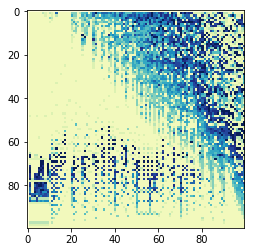

In [26]:
matrix = np.load("final_matrix.npy")

plt.imshow(matrix, cmap = 'YlGnBu')

plt.show()

In [27]:
def test_strat2():
    static_scores = np.load("final_matrix.npy")
    score_arr = np.load("final_matrix.npy")
    def our_strategy(score, opp_score):
        return int(score_arr[score][opp_score])
    def opp_strategy(score, opp_score):
        return int(static_scores[score][opp_score])
    for score in reversed(range(1, 100)):
        for opp_score in reversed(range(1, 100)):
            print("score and opp score: ", score, opp_score)
            roll_arr = []   #array w. 11 items (0 to 10) ==> win percentage
            for roll in range(0, 11):
                total_plays = 0
                wins = 0 # to divide to get win rate
                for trial in range(0, 1000):
                    new_score = score + take_turn(roll, opp_score)
                    if new_score < 100:
                        new_score, new_opp_score = play(our_strategy, opp_strategy, new_score, opp_score)
                    if new_score > opp_score:
                        wins += 1
                    total_plays += 1
                roll_arr.append(wins/total_plays)
            print("roll arr:", roll_arr)
            score_arr[score][opp_score] = new_arg_max(roll_arr) #can change to np.argmax(roll_arr) to go back to min
            print(score_arr[score][opp_score])
            np.save("final_matrix_2.npy", score_arr)

In [30]:
test_strat2()


score and opp score:  99 99
roll arr: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


TypeError: flatnonzero() got an unexpected keyword argument 'array'

In [28]:
def new_arg_max(array):
    array = np.array(array)
    maxes = np.flatnonzero(array = array.max())
    return np.max(maxes)

In [29]:
copy_paste(np.load("final_matrix_2.npy"))

FileNotFoundError: [Errno 2] No such file or directory: 'final_matrix_2.npy'